# Exploratory Data Analysis of Hotel Booking Demand
This data set contains booking information for a city hotel, a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

We found this data set on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand) but the data is originally from the article [Hotel Booking Demand Datasets - ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) written in journal named [Data in Brief](https://www.sciencedirect.com/journal/data-in-brief), Volume 22, February 2019. 
The subject area of this data is **hospitality management**. This data was acquired by extraction from hotel's Property Management System (PMS) SQL databases from 2015 to 2017. **Both hotels are located in Portugal**.

Since this is hotel real data, all data elements pertaining hotel or customer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, as well as in other fields.

This Exploratory Data Analysis was created by Team 6 of *Job Connector Data Science of Purwadhika Batch 10*:
- Teguh Aria
- Sekar Krismaya Weni
- Brian Ivan Cusuanto

# 1) Preparaction of Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
hotel = pd.read_csv("hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
col_detail = ["Hotel (H1 = Resort Hotel or H2 = City Hotel).", 
              "Value indicating if the booking was canceled (1) or not (0).",
              "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.",
              "Year of arrival date.",
              "Month of arrival date.",
              "Week number of year for arrival date.",
              "Day of arrival date.",
              "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.",
              "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.",
              "Number of adults.",
              "Number of children.",
              "Number of babies.",
              "Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).",
              "Country of origin. Categories are represented in the ISO 3155–3:2013 format.",
              "Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Value indicating if the booking name was from a repeated guest (1) or not (0).",
              "Number of previous bookings that were cancelled by the customer prior to the current booking.",
              "Number of previous bookings not cancelled by the customer prior to the current booking.",
              "Code of room type reserved. Code is presented instead of designation for anonymity reasons.",
              "Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.",
              "Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.",
              "Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.",
              "ID of the travel agency that made the booking.",
              "ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.",
              "Number of days the booking was in the waiting list before it was confirmed to the customer.",
              "Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.",
              "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.",
              "Number of car parking spaces required by the customer.",
              "Number of special requests made by the customer (e.g. twin bed or high floor).",
              "Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.",
              "Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel."]

hotel_descr = []
j = 0
for name in hotel.columns:
  hotel_descr.append(
      [
       name,
       hotel[name].dtypes,
       hotel[name].isnull().sum(),
       round(hotel[name].isnull().sum()/len(hotel)*100, 2),
       hotel[name].nunique(),
       hotel[name].unique(),
       col_detail[j]
       ]
       )
  j += 1

hotel_column_desc = pd.DataFrame(hotel_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(hotel.columns)} columns.")

Total column of this data set is: 32 columns.


# 2) Explaination of Each Column

In [ ]:
# hotel_column_desc.style.set_properties(subset=['Description'], **{'width':'300px'})
hotel_column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]",Hotel (H1 = Resort Hotel or H2 = City Hotel).
1,is_canceled,int64,0,0.00,2,"[0, 1]",Value indicating if the booking was canceled (...
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...",Number of days that elapsed between the enteri...
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]",Year of arrival date.
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D...",Month of arrival date.
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",Week number of year for arrival date.
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",Day of arrival date.
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...",Number of weekend nights (Saturday or Sunday) ...
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...",Number of week nights (Monday to Friday) the g...
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]",Number of adults.


# 3) Handling Missing Value

## 'children' column

In [ ]:
# Fill Null/NaN value with Most Frequent
  # Why? Because if we look at Univariate Analysis of 'children' column, we see that its mean or median says '0'. 
  # Means that its value is dominated by '0' value

from sklearn.impute import SimpleImputer
imputer_most = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

print(f"There are {hotel['children'].isnull().sum()} null value in 'children' column before imputation.")
print("="*25, "Imputing....", "="*25)

hotel['children'] = imputer_most.fit_transform(hotel['children'].values.reshape(-1,1))
hotel['children'] = hotel['children'].astype(int)
print(f"There are {hotel['children'].isnull().sum()} null value in 'children' column.")

There are 4 null value in 'children' column before imputation.
========================= Imputing.... =========================
There are 0 null value in 'children' column.


## 'country' column

In [ ]:
print(f"There are {hotel['country'].isnull().sum()} null value in 'country' column before imputation.")
print("="*25, "Imputing....", "="*25)

hotel['country'] = imputer_most.fit_transform(hotel['country'].values.reshape(-1,1))
print(f"There are {hotel['country'].isnull().sum()} null value in 'country' column after imputation.")

There are 488 null value in 'country' column before imputation.
========================= Imputing.... =========================
There are 0 null value in 'country' column after imputation.


## 'agent' and 'company' column

In [ ]:
# Agent -- ID of the travel agency that made the booking.
# Company -- ID of the company/entity that made the booking.
# ID of travel agency or company isn't obvious, 
  # they consist of ID number that represents the name of Travel Agency or Company 
  # but since it's confidential we don't really know what its name and kind of useless to use this column
  # so we drop this 2 columns

print(f"There are {len(hotel.columns)} columns before dropping process.")
print("="*25, "Dropping Columns....", "="*25)

hotel.drop(['agent', 'company'], axis = 1, inplace = True)
print(f"There are {len(hotel.columns)} columns after dropping process.")

There are 32 columns before dropping process.
========================= Dropping Columns.... =========================
There are 30 columns after dropping process.


# 4) Feature Engineering

## 'arrival_date' column

In [ ]:
# hotel['arrival_date'] = hotel[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].agg('-'.join, axis=1)
hotel['arrival_date'] = hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str)
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date'])

print(f"The type of 'arrival_date' column is {hotel['arrival_date'].dtypes}.")

The type of 'arrival_date' column is datetime64[ns].


In [ ]:
# month
hotel['arrival_month'] = hotel['arrival_date'].dt.month
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7


In [ ]:
# day
hotel['arrival_day'] = hotel['arrival_date'].dt.day_name()
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday


In [ ]:
# year
hotel['arrival_year'] = hotel['arrival_date'].dt.year
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015


In [ ]:
# month year
hotel['month_year'] = pd.to_datetime(hotel['arrival_date']).dt.to_period('M')

## 'booking_date' column

In [ ]:
import datetime as dt
# hotel['lead_time'] = hotel['lead_time'].apply(lambda x: dt.timedelta(days = x)) 
hotel['booking_date'] = hotel['arrival_date'] - hotel['lead_time'].apply(lambda x: dt.timedelta(days = x))

print(f"The type of 'booking_date' column is {hotel['booking_date'].dtypes}.")

The type of 'booking_date' column is datetime64[ns].


## 'total_stays' column

In [ ]:
hotel['total_stays'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
print(f"The type of 'total_stays' column is {hotel['total_stays'].dtypes}.")

The type of 'total_stays' column is int64.


In [ ]:
#Adding total stays column
# hotel['total_stays'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
hotel['total_spending'] = hotel['total_stays'] * hotel['adr']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2014-07-24,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2013-06-24,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-24,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-18,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-07,2015-06-17,2,196.0


## 'reservation_status_date' column

In [ ]:
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
print(f"The type of 'reservation_status_date' column is {hotel['reservation_status_date'].dtypes}.")

The type of 'reservation_status_date' column is datetime64[ns].


## 'meal' column

In [ ]:
hotel['meal'].replace('Undefined', 'SC', inplace = True)
hotel['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

## 'guest' column

In [ ]:
hotel['guest'] = hotel['adults'] + hotel['children'] + hotel['babies']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2014-07-24,0,0.0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2013-06-24,0,0.0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-24,1,75.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-18,1,75.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-07,2015-06-17,2,196.0,2


In [ ]:
hotel.drop(labels = hotel[hotel['guest'] == 0].index, axis = 0, inplace = True)
hotel[hotel['guest'] == 0]
#we are dropping this columns because it doesn't make any sense the number of guest is 0 in a confirmed booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest


## 'kids' column

In [ ]:
hotel['kids'] = hotel['children'] + hotel['babies']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2014-07-24,0,0.0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2013-06-24,0,0.0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-24,1,75.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-18,1,75.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-07,2015-06-17,2,196.0,2,0


## 'adr' column

In [ ]:
hotel = hotel.drop(hotel[hotel.adr < 0].index)
# we are dropping this row because adr stands for average daily rate and it doesn't make any sense if the average daily rate is below 0
# there's no way a hotel owe money to the guest

#5) Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

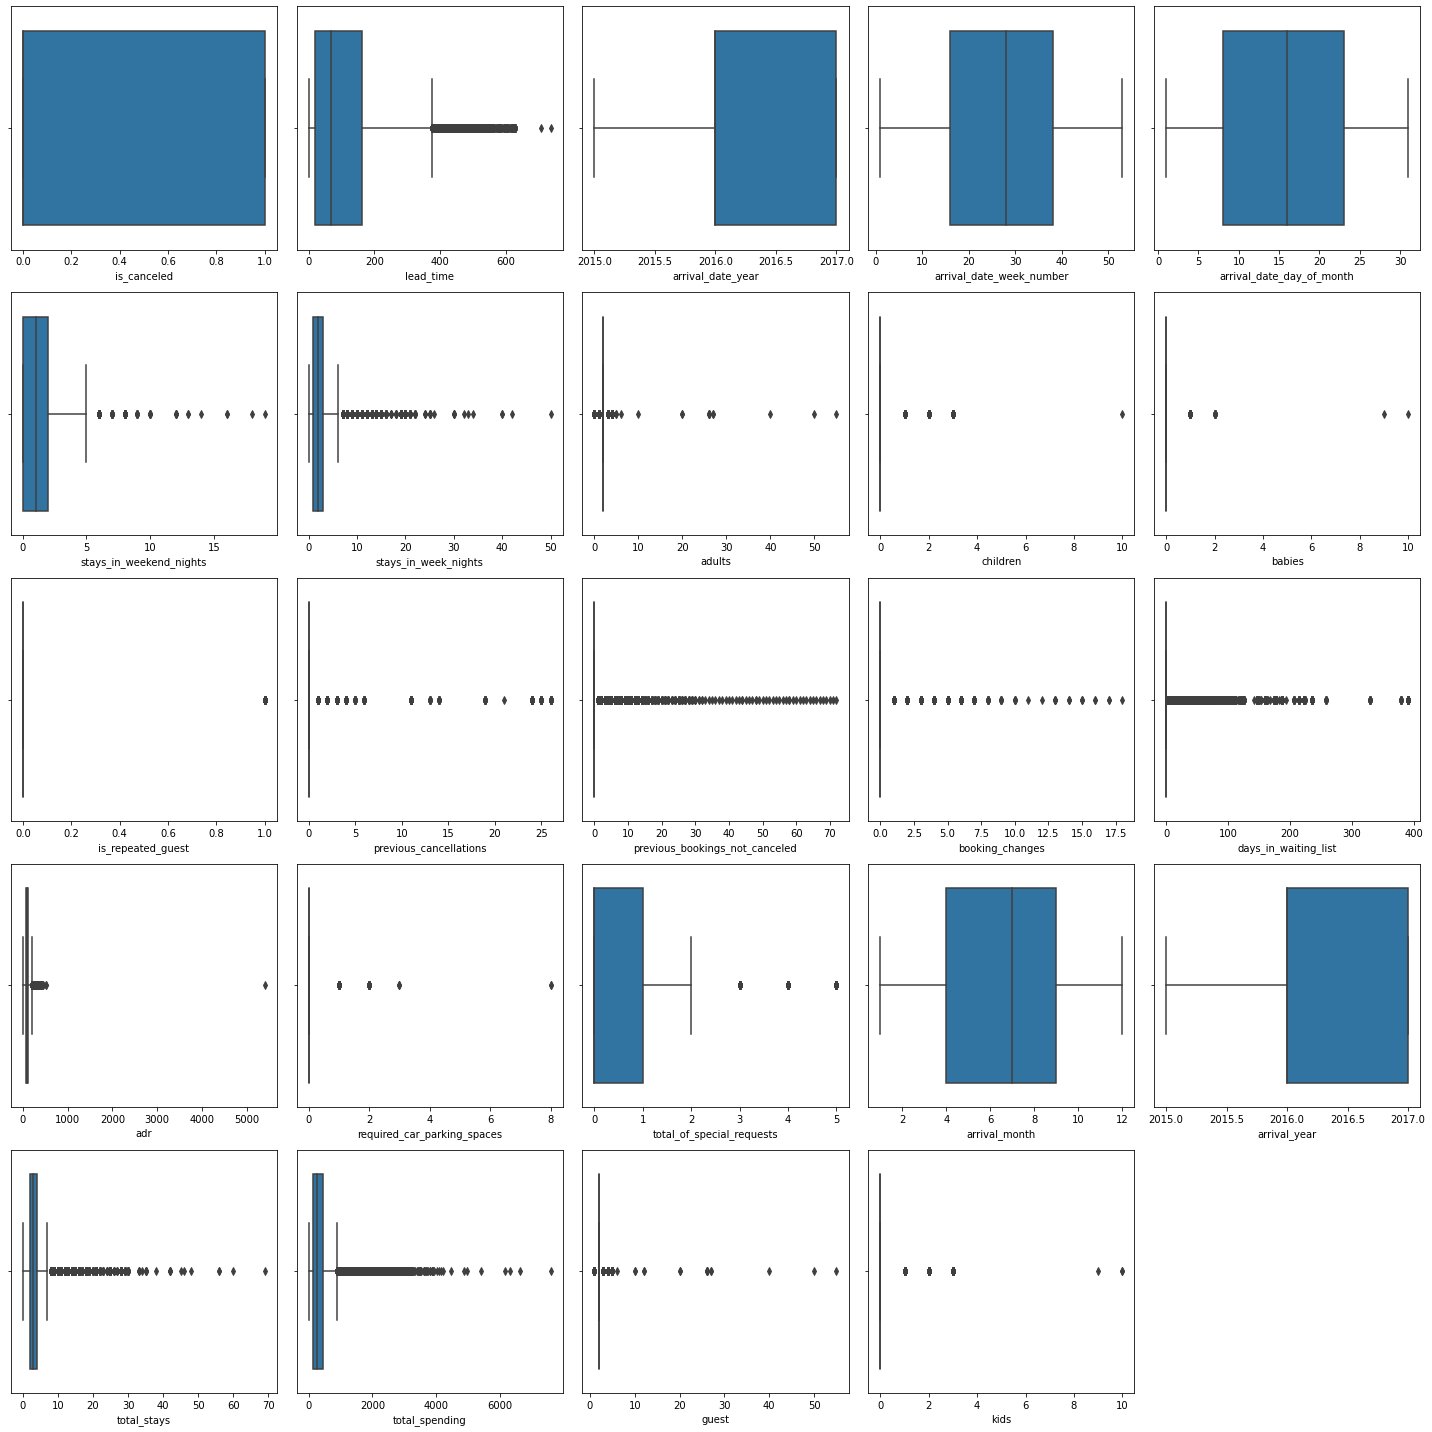

In [ ]:
plt.figure(figsize = (20, 20))

x = 1

for column in hotel.describe().columns:
    plt.subplot(5, 5, x)
    sns.boxplot(hotel[column])
    x += 1
    plt.tight_layout()

# kita melihat bahwa sebagian besar kolom memiliki data outliers.
# namun kolom yang tidak memiliki outliers adalah:
# is_canceled, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, arrival_month, arrival_year

In [ ]:
df_canceled = hotel[hotel['is_canceled'] == 1]
df_not_canceled = hotel[hotel['is_canceled'] == 0]

# decided to divide into 2 dataset for further analysis purposes

# 6) Descriptive Analysis

## Univariate

In [ ]:
# numerical descriptive analysis
hotel.describe().T

# terlihat kolom yg memiliki standar deviasi tinggi adalah:
# lead_time, adr, total_spending

,count,mean,std,min,25%,50%,75%,max
is_canceled,119209.0,0.370769,0.483013,0.0,0.0,0.00,1.00,1.0
lead_time,119209.0,104.108465,106.875574,0.0,18.0,69.00,161.00,737.0
arrival_date_year,119209.0,2016.156465,0.707484,2015.0,2016.0,2016.00,2017.00,2017.0
arrival_date_week_number,119209.0,27.163520,13.601073,1.0,16.0,28.00,38.00,53.0
arrival_date_day_of_month,119209.0,15.798807,8.781051,1.0,8.0,16.00,23.00,31.0
stays_in_weekend_nights,119209.0,0.927027,0.995081,0.0,0.0,1.00,2.00,19.0
stays_in_week_nights,119209.0,2.499165,1.897087,0.0,1.0,2.00,3.00,50.0
adults,119209.0,1.859205,0.575188,0.0,2.0,2.00,2.00,55.0
children,119209.0,0.104044,0.398837,0.0,0.0,0.00,0.00,10.0
babies,119209.0,0.007961,0.097510,0.0,0.0,0.00,0.00,10.0


In [ ]:
# categorical descriptive analysis
hotel.describe(include='object').T

,count,unique,top,freq
hotel,119209,2,City Hotel,79163
arrival_date_month,119209,12,August,13861
meal,119209,4,BB,92235
country,119209,177,PRT,48961
market_segment,119209,8,Online TA,56408
distribution_channel,119209,5,TA/TO,97750
reserved_room_type,119209,9,A,85872
assigned_room_type,119209,11,A,74020
deposit_type,119209,3,No Deposit,104460
customer_type,119209,4,Transient,89476


In [ ]:
#### ====== ANALISIS DATA ########
### Univariate
import sidetable
##==Hotel column
#sidetable
hotel.stb.freq(['hotel'])
#interpretasi:
#city hotel memiliki persentage 66.4% lebih tinggi dari resort hotel

,hotel,count,percent,cumulative_count,cumulative_percent
0,City Hotel,79163,66.406899,79163,66.406899
1,Resort Hotel,40046,33.593101,119209,100.000000


In [ ]:
##==is_cancel column
#sidetable
hotel.stb.freq(['is_canceled'])

,is_canceled,count,percent,cumulative_count,cumulative_percent
0,0,75010,62.923101,75010,62.923101
1,1,44199,37.076899,119209,100.000000


In [ ]:
##== meal columns
hotel['meal'].unique()
##change 'Undefined' category to 'SC'
# data['meal'] = data['meal'].replace('Undefined', 'SC')

#pandas
# data['meal'].value_counts(normalize=True)
# #sidetable
hotel.stb.freq(['meal'])

,meal,count,percent,cumulative_count,cumulative_percent
0,BB,92235,77.372514,92235,77.372514
1,HB,14458,12.128279,106693,89.500793
2,SC,11718,9.829795,118411,99.330587
3,FB,798,0.669413,119209,100.000000


In [ ]:
##== market segment column
hotel['market_segment'].unique()
hotel['market_segment'].mode()
##change 'Undefined' category to 'Online TA' based on mode
# data['market_segment'] = data['market_segment'].replace('Undefined', 'Online TA')

#sidetable
hotel.stb.freq(['market_segment'])

,market_segment,count,percent,cumulative_count,cumulative_percent
0,Online TA,56408,47.318575,56408,47.318575
1,Offline TA/TO,24182,20.285381,80590,67.603956
2,Groups,19790,16.601096,100380,84.205052
3,Direct,12582,10.554572,112962,94.759624
4,Corporate,5282,4.430874,118244,99.190497
5,Complementary,728,0.610692,118972,99.801190
6,Aviation,235,0.197133,119207,99.998322
7,Undefined,2,0.001678,119209,100.000000


In [ ]:
##== distribution_channel
hotel['distribution_channel'].unique()
hotel['distribution_channel'].mode()
##change 'Undefined' category to 'TA/TO' based on mode
# data['distribution_channel'] = data['distribution_channel'].replace('Undefined', 'TA/TO')

#sidetable
hotel.stb.freq(['distribution_channel'])

,distribution_channel,count,percent,cumulative_count,cumulative_percent
0,TA/TO,97750,81.998842,97750,81.998842
1,Direct,14610,12.255786,112360,94.254628
2,Corporate,6651,5.579277,119011,99.833905
3,GDS,193,0.161901,119204,99.995806
4,Undefined,5,0.004194,119209,100.000000


In [ ]:
#let see which types of hotel has a higher cancelation percentage of cancelation

round(hotel.groupby('hotel').sum() / len(hotel.index), 2)['is_canceled']

#this tells that city hotel has a higher rate of cancelation compared to resort hotel

hotel
City Hotel      0.28
Resort Hotel    0.09
Name: is_canceled, dtype: float64

## Multivariate

In [ ]:
#### ====== ANALISIS DATA =======
### Bivariate/Multivariate

##== country column and is_canceled
#sidetable
# data_cancel
print('Most 5 Country that cancel booking')
print(df_canceled.stb.freq(['country']).head())
print('--'*40)
print('Most 5 Country that not cancel booking')
print(df_not_canceled.stb.freq(['country']).head())

#interpretasi:
#PRT(Portugal) merupkan negara penyumbang booking hotel tertinggi dengan persentage 28,5% namun juga negara penyumbang 
#paling banyak cancel mencapai 62.3%

Most 5 Country that cancel booking
  country  count    percent  cumulative_count  cumulative_percent
0     PRT  27563  62.361139             27563           62.361139
1     GBR   2452   5.547637             30015           67.908776
2     ESP   2177   4.925451             32192           72.834227
3     FRA   1933   4.373402             34125           77.207629
4     ITA   1333   3.015905             35458           80.223534
--------------------------------------------------------------------------------
Most 5 Country that not cancel booking
  country  count    percent  cumulative_count  cumulative_percent
0     PRT  21398  28.526863             21398           28.526863
1     GBR   9667  12.887615             31065           41.414478
2     FRA   8468  11.289161             39533           52.703640
3     ESP   6383   8.509532             45916           61.213172
4     DEU   6067   8.088255             51983           69.301426


In [ ]:
#crosstab between is_cancel, adr
pd.crosstab(index=hotel['hotel'], values=hotel['adr'], columns=hotel['is_canceled'], aggfunc='mean')

#interpretasi:
# pada resort hotel, nilai adr customers yang melakukan cancel booking lebih besar
# artinya customers melakukan cancel karena adr yang tinggi

is_canceled,0,1
hotel,,
City Hotel,106.036141,104.760710
Resort Hotel,90.825887,105.806037


In [ ]:
#crosstab among is_canceled, market_segment, adr
hotel['market_segment'] = hotel['market_segment'].replace('Undefined', 'Online TA')
pd.crosstab(index=hotel['market_segment'], columns=hotel['is_canceled'], values=hotel['adr'], aggfunc='mean')

#interpretasi:
#pada segment market, rata2 adr customers yang melakukan cancel (1) lebih besar dibandingkan dengan yang tidak cancel (0)
#kecuali pada segment complementary
#rata2 adr tertinggi baik customers yang melakukan cancel (1) maupun tidak cancel (0) terdapat pada market segment direct
#hal ini sejalan dengan jumlah customers pada market segment direct yang kecil (karena adr tinggi)


is_canceled,0,1
market_segment,,
Aviation,100.569290,102.490385
Complementary,3.112269,1.750899
Corporate,67.291431,79.214046
Direct,114.095486,124.108454
Groups,77.305316,81.001249
Offline TA/TO,83.554932,94.985820
Online TA,114.035151,122.955542


In [ ]:
#crosstab among guests and reservation_status
pd.crosstab(index=hotel['reservation_status'], columns=hotel['guest'])

#melakukan drop pada data guest=0 & reservation_status== checkout, karena tidak wajar
# data.drop(data.loc[(data['guests'] == 0) & (data['reservation_status'] == 'Check-Out')].index, inplace=True)

guest,1,2,3,4,5,6,10,12,20,26,27,40,50,55
reservation_status,,,,,,,,,,,,,,
Canceled,6114,31946,3278,1607,34,1,1,0,2,5,2,1,1,1
Check-Out,16026,49478,7118,2283,103,0,1,1,0,0,0,0,0,0
No-Show,441,626,99,39,0,0,0,1,0,0,0,0,0,0


In [ ]:
arrival_date_dt = hotel['arrival_date'].dt
#crosstab among adr, arival month, is_canceled
pd.crosstab(columns= arrival_date_dt.month, index=hotel['is_canceled'], values=hotel['adr'], aggfunc='median')

#interpretasi:
#rata2 adr tertinggi pada cancel(1) maupun not cancel(0) terdapat pada bulan agustus
#rata2 adr pada pada bulan2 selain (7,8,9) untuk cancel lebih tinggi 


arrival_date,1,2,3,4,5,6,7,8,9,10,11,12
is_canceled,,,,,,,,,,,,
0,66.0,73.9,75.95,95.0,104.0,112.0,120.7,132.0,103.0,85.0,69.000,72.25
1,77.6,75.0,83.40,100.0,112.0,120.0,112.5,126.0,98.1,90.0,82.905,79.20


In [ ]:
#crosstab reserved_room_type, adr, hotel
pd.crosstab(index=hotel['hotel'], columns=hotel['reserved_room_type'], values=hotel['adr'], aggfunc='median')

reserved_room_type,A,B,C,D,E,F,G,H,L
hotel,,,,,,,,,
City Hotel,94.00,87.0,90.000,132.00,162.0,189.365,222.15,NaN,NaN
Resort Hotel,60.75,110.0,163.415,83.03,98.0,117.745,155.00,184.0,143.0


In [ ]:
#crosstab is_canceled, meal
pd.crosstab(index=hotel['is_canceled'], columns=hotel['meal'])

#Tapi count FB cancelnya tinggi dibandingkan tidak cancel()

meal,BB,FB,HB,SC
is_canceled,,,,
0,57729,320,9475,7486
1,34506,478,4983,4232


In [ ]:
#crosstab is_canceled, meal
pd.crosstab(index=hotel['is_canceled'], columns=hotel['meal'])

#Tapi count FB cancelnya tinggi dibandingkan tidak cancel()

meal,BB,FB,HB,SC
is_canceled,,,,
0,57729,320,9475,7486
1,34506,478,4983,4232


In [ ]:
#crosstab is_canceled, adr, meal
pd.crosstab(index=hotel['is_canceled'], columns=hotel['meal'], values=hotel['adr'], aggfunc='median')

# interpretasi:
# pada FB adr untuk cancel itu rendah?

meal,BB,FB,HB,SC
is_canceled,,,,
0,90.0,109.18,108.0,93.0
1,95.0,81.00,102.5,97.0


In [ ]:
pd.crosstab(index = hotel['is_canceled'], columns = hotel['hotel'], normalize = True).round(2)

hotel,City Hotel,Resort Hotel
is_canceled,,
0,0.39,0.24
1,0.28,0.09


In [ ]:
pd.crosstab(index = hotel['month_year'], columns = [hotel['is_canceled'],hotel['hotel']], normalize = 'index').round(2)
# july of 2015 seems to be to worst performing month for city hotel with highest cancellation rate with 34 % in a single month
#  for resort hotel highest cancelation rate happened on August 2017 with a cancellation rate of 14 % in a single month

# higest number of confirmed arrival (not_cancelled booking) for city hotel is on July 2017 with 46 % of confirmed arrival from total booking of both hotel
# higest number of confirmed arrival (not_cancelled booking) for resort hotel is on November 2015 with 39 % of confirmed arrival from total booking of both hotel

#for majority of the month year city hotel have a higher confirmed arrival compared to resort hotel, with an exeption of july 2015 resort hotel has higher confirmed arrival

is_canceled          0                       1             
hotel       City Hotel Resort Hotel City Hotel Resort Hotel
month_year                                                 
2015-07           0.16         0.38       0.34         0.12
2015-08           0.32         0.27       0.32         0.09
2015-09           0.39         0.20       0.30         0.11
2015-10           0.42         0.23       0.27         0.08
2015-11           0.40         0.39       0.13         0.08
2015-12           0.34         0.33       0.23         0.10
2016-01           0.41         0.34       0.19         0.05
2016-02           0.37         0.29       0.24         0.10
2016-03           0.40         0.29       0.23         0.08
2016-04           0.37         0.25       0.28         0.10
2016-05           0.41         0.24       0.26         0.09
2016-06           0.42         0.19       0.33         0.07
2016-07           0.46         0.22       0.23         0.10
2016-08           0.42         0.22       0.25         0.11
2016-09           0.43         0.20       0.29         0.08
2016-10           0.37         0.23       0.31         0.09
2016-11           0.39         0.24       0.31         0.06
2016-12           0.36         0.27       0.28         0.08
2017-01           0.36         0.30       0.28         0.06
2017-02           0.39         0.29       0.23         0.09
2017-03           0.43         0.23       0.26         0.08
2017-04           0.35         0.21       0.34         0.09
2017-05           0.37         0.19       0.35         0.09
2017-06           0.38         0.19       0.32         0.11
2017-07           0.42         0.21       0.25         0.12
2017-08           0.41         0.22       0.23         0.14

In [ ]:
pd.crosstab(index = hotel['total_stays'], columns = [hotel['hotel'], hotel['is_canceled']],normalize = 'columns')

# For City hotel traveler who book for 2 days has the highest chances to cancel a booking compared to other group in city hotels 
# For Resort hotel traveler who book for 7 days has the highest cancelation rate compared to other group

hotel       City Hotel           Resort Hotel          
is_canceled          0         1            0         1
total_stays                                            
0             0.005447  0.000393     0.012826  0.000899
1             0.198659  0.124036     0.227442  0.105036
2             0.238326  0.315366     0.155155  0.155486
3             0.257985  0.286647     0.132338  0.167716
4             0.166956  0.146709     0.114810  0.135342
5             0.069655  0.053659     0.065650  0.079766
6             0.024108  0.028356     0.041658  0.053237
7             0.027016  0.024426     0.153288  0.194335
8             0.004448  0.005321     0.017597  0.023831
9             0.002582  0.002811     0.014105  0.019784
10            0.001736  0.003507     0.024131  0.021583
11            0.000716  0.001391     0.008297  0.006655
12            0.000716  0.000907     0.003077  0.006115
13            0.000325  0.000786     0.002593  0.002248
14            0.000564  0.002146     0.021780  0.016727
15            0.000304  0.000756     0.000795  0.000899
16            0.000130  0.000302     0.000415  0.001079
17            0.000087  0.000121     0.000380  0.000090
18            0.000022  0.000181     0.000173  0.002068
19            0.000043  0.000302     0.000138  0.000540
20            0.000022  0.000363     0.000000  0.000090
21            0.000022  0.000272     0.001210  0.002338
22            0.000043  0.000121     0.000242  0.000000
23            0.000022  0.000030     0.000035  0.000450
24            0.000022  0.000151     0.000000  0.000000
25            0.000000  0.000060     0.000484  0.001888
26            0.000000  0.000091     0.000000  0.000270
27            0.000000  0.000091     0.000000  0.000090
28            0.000000  0.000091     0.000761  0.000809
29            0.000000  0.000302     0.000069  0.000090
30            0.000000  0.000242     0.000069  0.000270
33            0.000000  0.000060     0.000000  0.000090
34            0.000022  0.000000     0.000000  0.000000
35            0.000000  0.000000     0.000173  0.000000
38            0.000000  0.000000     0.000035  0.000000
42            0.000000  0.000000     0.000104  0.000090
45            0.000000  0.000000     0.000035  0.000000
46            0.000000  0.000000     0.000035  0.000000
48            0.000022  0.000000     0.000000  0.000000
56            0.000000  0.000000     0.000035  0.000090
60            0.000000  0.000000     0.000035  0.000000
69            0.000000  0.000000     0.000035  0.000000

In [ ]:
pd.crosstab(index = hotel['meal'], columns = [hotel['is_canceled'], hotel['hotel']], normalize = 'columns')

# conclusion from this table most traveler who come to city or resort hotel mostly prefer bed and breakfast meal package
# bed and breakfast has the highest cancellation rate for both hotel
# for city hotel no meal package (SC) has the second highest cancellation rate after BB
# for resort hotel Half board (HB) package  has the second highest cancellation rate

# for city hotel lowest cancellation rate is FB meal package
# for the resort hotel lowest cancellation rate is no meal package(SC)


is_canceled          0                       1             
hotel       City Hotel Resort Hotel City Hotel Resort Hotel
meal                                                       
BB            0.771851     0.766058   0.806040     0.705306
FB            0.000195     0.010752   0.001058     0.039838
HB            0.086277     0.190106   0.073642     0.229047
SC            0.141676     0.033084   0.119260     0.025809

In [ ]:
pd.crosstab(index = hotel['arrival_day'], columns = [hotel['hotel'], hotel['is_canceled']], normalize = 'columns').round(2)

# For Resort hotel booking with arrival day of saturday seem to have the highest cancellation rate
# while for city hotel booking with with arrival day of thursday and friday have the highest cancellation rate



hotel       City Hotel       Resort Hotel      
is_canceled          0     1            0     1
arrival_day                                    
Friday            0.17  0.19         0.13  0.16
Monday            0.16  0.14         0.16  0.15
Saturday          0.13  0.15         0.16  0.21
Sunday            0.13  0.10         0.12  0.13
Thursday          0.14  0.19         0.16  0.15
Tuesday           0.12  0.10         0.13  0.10
Wednesday         0.14  0.14         0.13  0.11

In [ ]:
(hotel.groupby('lead_time')['is_canceled'].sum().sort_values(ascending = False).head(20)) / len(df_canceled.index)

# 1% of total cancellation come from traveler who booked the hotel on the same day as the arrival
# other than 0 and 1 day lead time cancellation seems to be on the higher side if lead time is more than 2



lead_time
0      0.009435
56     0.008009
28     0.007670
34     0.007466
37     0.007217
1      0.007195
38     0.006312
12     0.006290
68     0.005950
19     0.005905
18     0.005905
87     0.005747
277    0.005724
44     0.005724
15     0.005701
92     0.005611
27     0.005543
30     0.005498
105    0.005362
74     0.005339
Name: is_canceled, dtype: float64

In [ ]:
pd.crosstab(columns = hotel['is_canceled'], index = hotel['deposit_type'], normalize = 'columns').round(3)

# most of the booking (confirmed or canceled) has no deposit
# non refundable has the lowest number confirmed booking (not cancelled) with only 0.1 % of confirmed arrival
# however 33 % of canceled booking comes from traveler who booked with non refund policy
# Refundable deposit type has the lowest percentage of cancellation compared to other deposit type


is_canceled,0,1
deposit_type,,
No Deposit,0.997,0.671
Non Refund,0.001,0.328
Refundable,0.002,0.001


In [ ]:
print(pd.crosstab(columns = [hotel['hotel'],hotel['is_canceled']], index = hotel['deposit_type']))
print("")

print("-" * 50)

print("")
print(pd.crosstab(columns = [hotel['hotel'],hotel['is_canceled']], index = hotel['deposit_type'],normalize = 'columns').round(4))

#General Analysis :
    # Both hotel has the highest confirmed booking and cancelled booking from no deposit policy
    # Of all deposit type policy, non refund seems to have the highest cancellation rate compared to it's confirmed arrival
    # very low percentage of confirmed booking and canceled booking in refundable deposit policy

# Suggestion :
    # Both Hotel should try to push more on the refundable deposit policy since in both hotel it has the lowest of cancellation rate
    # cheaper rate for refundable program

hotel        City Hotel        Resort Hotel      
is_canceled           0      1            0     1
deposit_type                                     
No Deposit        46054  20221        28737  9448
Non Refund           24  12844           69  1650
Refundable            6     14          120    22

--------------------------------------------------

hotel        City Hotel         Resort Hotel        
is_canceled           0       1            0       1
deposit_type                                        
No Deposit       0.9993  0.6113       0.9935  0.8496
Non Refund       0.0005  0.3883       0.0024  0.1484
Refundable       0.0001  0.0004       0.0041  0.0020


In [ ]:
print(pd.crosstab(index = hotel['market_segment'], columns = hotel['is_canceled']))

print("")

print('-' * 50)

print("")

print(pd.crosstab(index = hotel['market_segment'], columns = hotel['is_canceled'], normalize = 'index'))

# Analysis :
    # Of all distribution channel  group booking is the only market segment that has a higher cancellation rate compared to it's  confirmed booking
    # Complementary has the lowest of cancellation rate compared to other market segment
    # next to complementary direct booking seems to be the 2nd lowest cancellation rate among all market segment
    



is_canceled         0      1
market_segment              
Aviation          183     52
Complementary     639     89
Corporate        4291    991
Direct          10648   1934
Groups           7696  12094
Offline TA/TO   15880   8302
Online TA       35673  20737

--------------------------------------------------

is_canceled            0         1
market_segment                    
Aviation        0.778723  0.221277
Complementary   0.877747  0.122253
Corporate       0.812382  0.187618
Direct          0.846288  0.153712
Groups          0.388883  0.611117
Offline TA/TO   0.656687  0.343313
Online TA       0.632388  0.367612


In [ ]:
print(pd.crosstab(index = hotel['market_segment'], columns = [hotel['deposit_type'],hotel['is_canceled']], margins = True))
print("")
print('-' * 90)
print(pd.crosstab(index = hotel['market_segment'], columns = [hotel['deposit_type'],hotel['is_canceled']], normalize = 'index'))

# Analysis :
    # Among all market segmentation, group with non refund policy has the highest rate of cancellation

deposit_type   No Deposit        Non Refund        Refundable         All
is_canceled             0      1          0      1          0   1        
market_segment                                                           
Aviation              183     52          0      0          0   0     235
Complementary         639     89          0      0          0   0     728
Corporate            4266    678         22    312          3   1    5282
Direct              10641   1916          3     16          4   2   12582
Groups               7517   2971         62   9110        117  13   19790
Offline TA/TO       15875   3297          3   5003          2   2   24182
Online TA           35670  20666          3     53          0  18   56410
All                 74791  29669         93  14494        126  36  119209

------------------------------------------------------------------------------------------
deposit_type   No Deposit           Non Refund           Refundable          
is_canceled     

In [ ]:
pd.crosstab(index = hotel['market_segment'], columns = [ hotel['deposit_type'],hotel['is_canceled']], values = hotel['adr'], aggfunc = 'median')

# For No deposit booking corporate booking have the lowest median adr for confirmed traveler
# for canceled  no deposit booking group booking has the lowest adr

# group booking has the lowest adr median for non refund canceled or confirmed booking
# group booking also has the lowest median adr for refundable canceled or confirmed booking

deposit_type   No Deposit         Non Refund        Refundable        
is_canceled             0       1          0      1          0       1
market_segment                                                        
Aviation            95.00  106.75        NaN    NaN        NaN     NaN
Complementary        0.00    0.00        NaN    NaN        NaN     NaN
Corporate           65.00   72.00     106.00   90.0       85.5   79.00
Direct             104.00  114.00      89.00  100.0       70.0  127.50
Groups              72.00   63.40      54.50   75.0       66.0   46.00
Offline TA/TO       80.75   85.00      72.25   95.0       74.0   78.23
Online TA          107.10  116.10     173.95   85.5        NaN  139.50

In [ ]:
pd.crosstab(index = hotel['market_segment'], columns = [ hotel['deposit_type'],hotel['is_canceled']], values = hotel['total_spending'], aggfunc = 'median')

# For non cancelled booking Online Travel agent has the highest median total spending for No deposit and No Refund Policy
# Corporate has the lowest total spending for no deposit policy (complementary excluded)
# Non cancelled Direct Booking has the lowest median total spending for refundable, and no refund policy 
#


deposit_type   No Deposit         Non Refund        Refundable         
is_canceled             0       1          0      1          0        1
market_segment                                                         
Aviation            285.0  190.00        NaN    NaN        NaN      NaN
Complementary         0.0    0.00        NaN    NaN        NaN      NaN
Corporate            88.0  100.00     318.00  200.0       85.5  474.000
Direct              237.6  340.00      89.00  300.0       70.0  659.250
Groups              196.0  188.40     109.00  180.0      240.0  184.000
Offline TA/TO       260.0  251.20     361.25  255.0      179.5  714.070
Online TA           315.9  381.45     335.32  167.0        NaN  473.005

In [ ]:
pd.crosstab(index = hotel['arrival_month'], columns = [hotel['hotel'], hotel['is_canceled']], values = hotel['adr'], aggfunc = 'median')


hotel         City Hotel         Resort Hotel        
is_canceled            0       1            0       1
arrival_month                                        
1                  80.00   80.00       45.000   51.50
2                  81.00   77.35       49.995   54.00
3                  88.00   89.32       55.000   58.60
4                 105.30  104.00       74.090   80.00
5                 117.84  120.60       72.000   78.56
6                 115.00  120.00      100.290  110.00
7                 112.00   96.00      145.670  163.00
8                 112.67  101.50      179.600  199.00
9                 109.00  101.50       87.765   81.00
10                100.00   98.10       57.970   58.00
11                 79.20   89.00       46.200   40.00
12                 81.88   88.00       55.000   66.00

In [ ]:
pd.crosstab(index = hotel['arrival_month'], columns = [hotel['hotel'], hotel['is_canceled']], values = hotel['total_spending'], aggfunc = 'median')

# From the month of may to september resort hotel has a higher median spending compared to city hotel
# August seem to be the highest median spending for both hotel

hotel         City Hotel        Resort Hotel        
is_canceled            0      1            0       1
arrival_month                                       
1                 195.00  176.0       86.000  144.00
2                 225.00  190.0      116.000  144.00
3                 244.50  261.9      153.000  224.07
4                 320.00  300.0      236.275  330.00
5                 323.00  300.0      258.000  324.00
6                 283.70  315.0      468.000  516.00
7                 280.00  270.0      671.020  840.00
8                 306.00  258.0      828.800  955.00
9                 250.20  240.0      404.440  317.00
10                257.01  226.8      184.000  243.00
11                216.75  267.0      120.000  129.60
12                232.00  260.0      132.000  204.00

# 7) Data Visualization

## Univariate

Text(0.5, 0, 'Arrival Year')

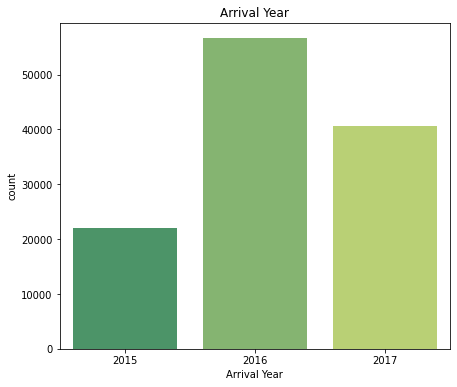

In [ ]:
##== arrival date column
#Visualisasi Data
plt.figure(figsize=(7,6))
plt.title('Arrival Year')
plt.xlabel('Arrival Year')

# most hotel booking is in 2016

Text(0.5, 0, 'Arrival Month')

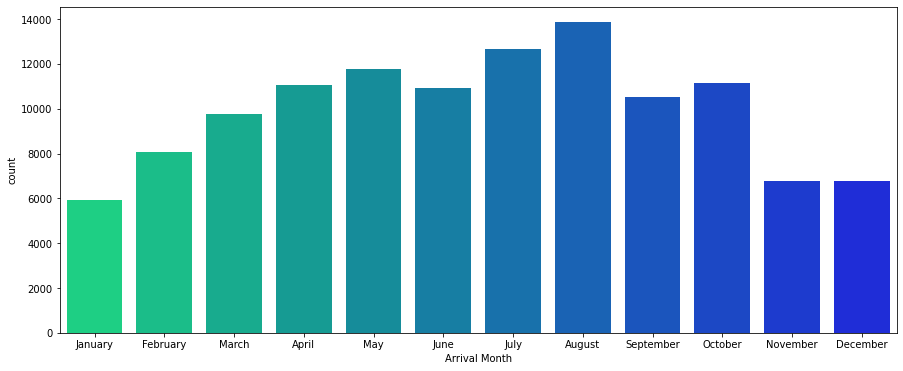

In [ ]:
##== arrival date column
plt.figure(figsize=(15,6))
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x=arrival_date_dt.month_name(), order=order, palette='winter_r')
plt.xlabel('Arrival Month')

#Interpretasi:
#Terlihat banyak customers yang datang pada bulan Agustus

Text(0.5, 0, 'Arrival Day')

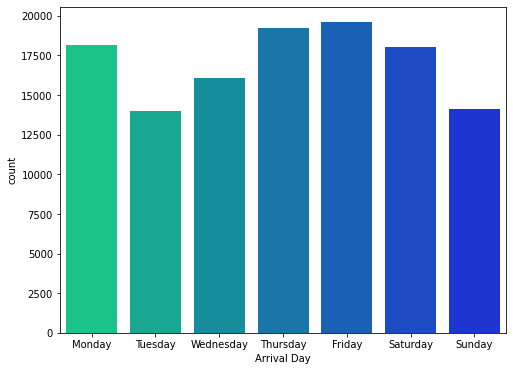

In [ ]:
##== arrival date column
plt.figure(figsize=(8,6))
order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']
sns.countplot(x=arrival_date_dt.day_name(), palette='winter_r', order=order)
plt.xlabel('Arrival Day')

# hari Senin, Kamis, dan Jumat adalah hari di mana guest banyak check in.

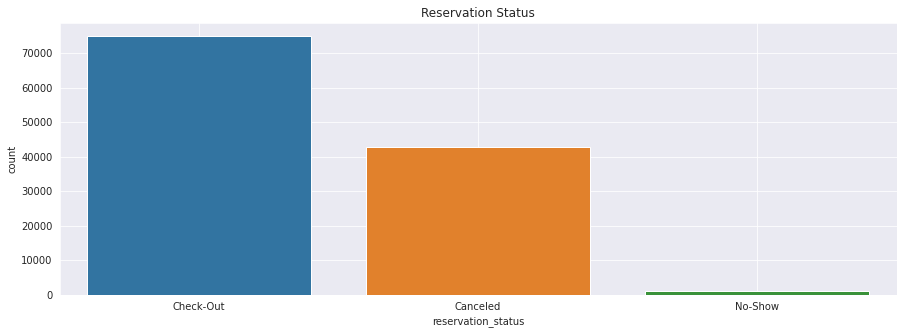

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'reservation_status', data = hotel)
plt.title("Reservation Status")
plt.grid(True)
plt.show()

# meskipun booking terlihat banyak yg di-cancel, 
# tapi jumlah guest yang menyelesaikan penginapannya lebih banyak dibandingkan yang dibatalkan

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


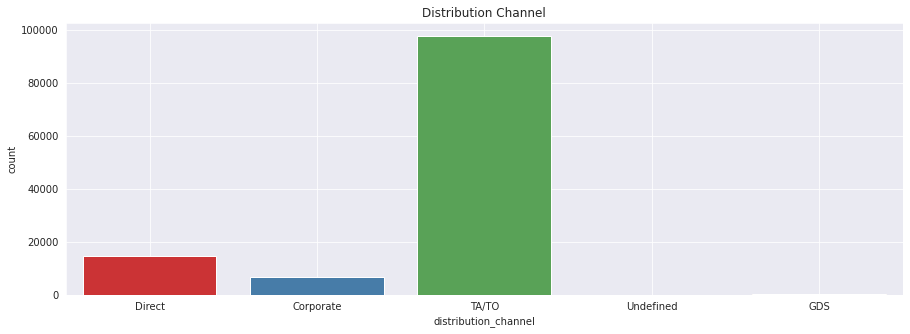

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(hotel['distribution_channel'], palette = 'Set1')
plt.title("Distribution Channel")
plt.grid(True)
plt.show()

# Terlihat booking distribution channel lebih didominasi oleh Travel Agent baik Online maupun Offline

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


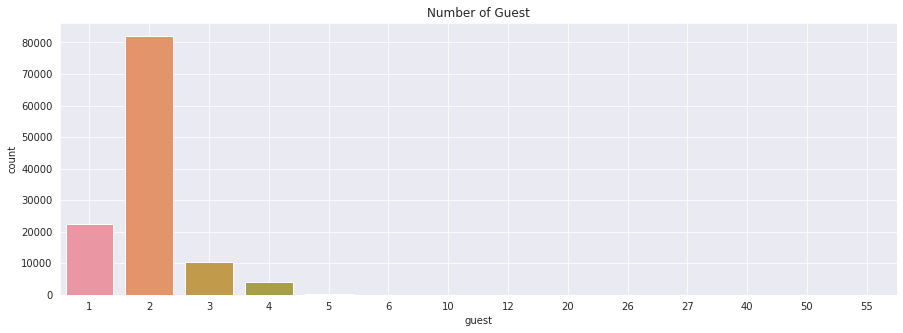

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(hotel['guest'])
plt.title("Number of Guest")
plt.grid(True)
plt.show()

# terlihat bahwa yang booking hotel itu untuk 2 orang

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


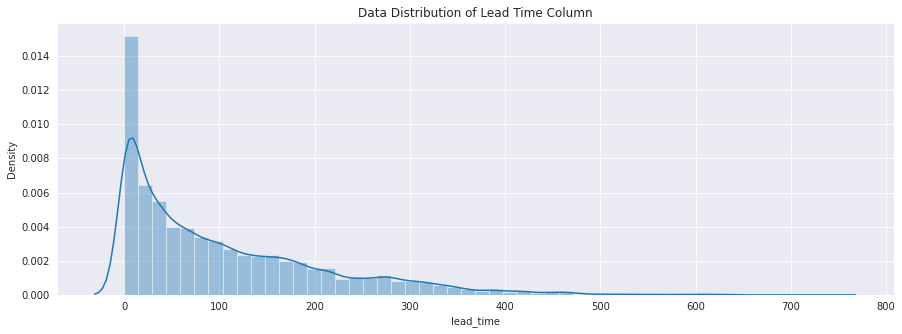

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(hotel['lead_time'])
plt.title("Data Distribution of Lead Time Column")
plt.grid(True)
plt.show()

# terlihat bahwa distribusi data pada 'lead time' menggambarkan right-skewed
# di mana nilai modus terpdapat pada rentang sekitar 0 hingga 20 days

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


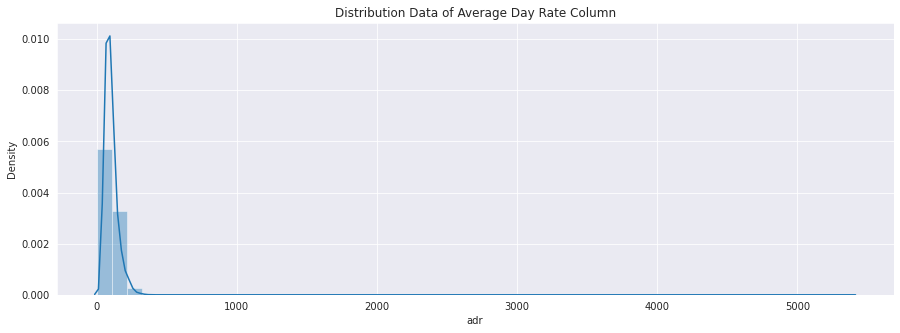

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(hotel['adr'])
plt.title("Distribution Data of Average Day Rate Column")
plt.grid(True)
plt.show()

# terlihat bahwa distribusi 'adr' mengarah ke right skewed karena data lebih banyak di rentang angka 500 ke bawah

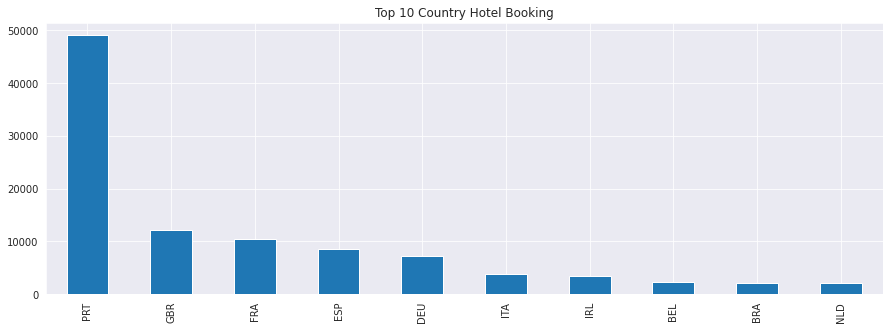

In [ ]:
plt.figure(figsize=(15,5))
hotel['country'].value_counts().head(10).plot(kind = 'bar')
plt.title("Top 10 Country Hotel Booking")
plt.grid(True)
plt.show()

# terlihat bahwa negara yang paling banyak melakukan booking adalah Portugal
# hal ini wajar mengingat data hotel ini dipublis pada negara Portugal

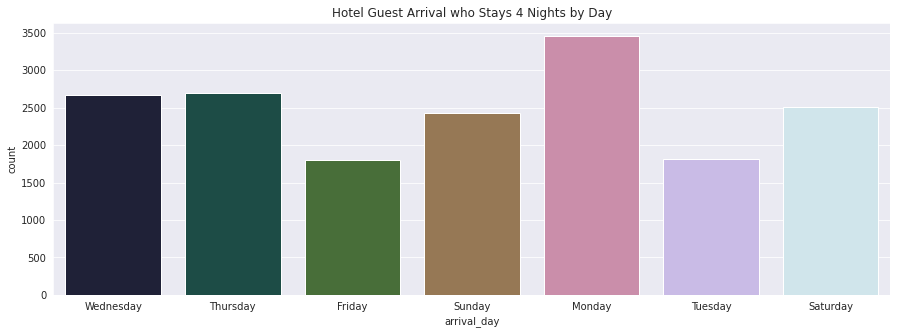

In [ ]:
# let's take a look on guest who stays 4 nights
plt.figure(figsize = (15,5))
sns.countplot(data = hotel[hotel['total_stays'] == 4], x = 'arrival_day',palette = 'cubehelix')
plt.title("Hotel Guest Arrival who Stays 4 Nights by Day")
plt.show()

# ternyata guest yg check in untuk 4 malam lebih banyak memulainya di hari Senin
# Jika memulai dari Senin untuk 4 malam, penginapan mereka berakhir pada hari Jumat

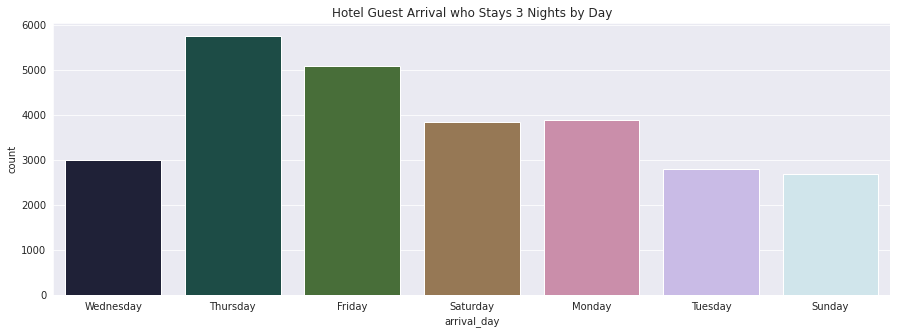

In [ ]:
# let's take a look on guest who stays 3 nights
plt.figure(figsize = (15,5))
sns.countplot(data = hotel[hotel['total_stays'] == 3], x = 'arrival_day',palette = 'cubehelix')
plt.title("Hotel Guest Arrival who Stays 3 Nights by Day")
plt.show()

# berbeda dengan guest yg booking untuk 3 malam
# guest paling banyak memulai menginap di hari Kamis
# jika mulai hari Kamis maka akan berakhir di Minggu

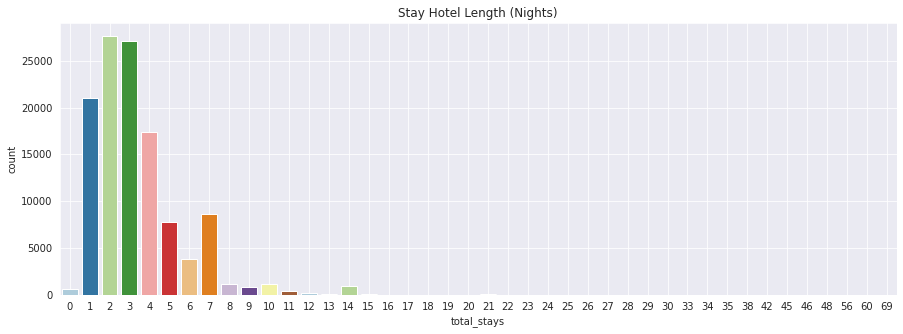

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel, x = 'total_stays', palette = 'Paired')
plt.title("Stay Hotel Length (Nights)")
plt.grid(True)
plt.show()

# Guest paling banyak menginap selama 2 malam, 3 malam, 1 malam, 4 malam, dan 7 malam

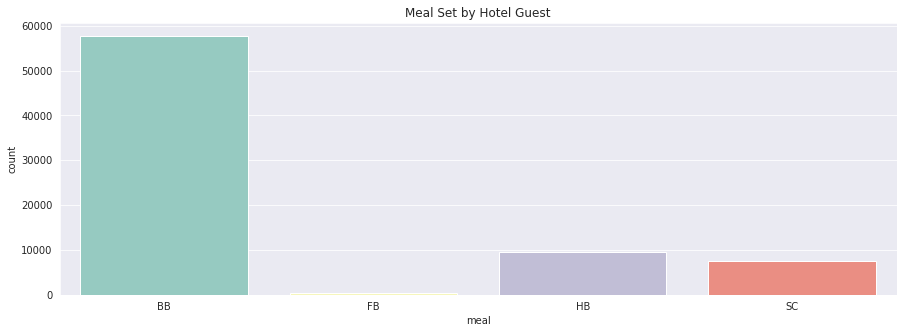

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel_nc, x = 'meal', palette = 'Set3')
plt.title("Meal Set by Hotel Guest")
plt.show()

# BB is Bed & Breakfast
# HB is Half Board -- Breakfast + one meal (usually dinner)
# SC is no meal package
# FB is Full Board -- Breakfast, Lunch, Dinner

# we see that 'BB' is the most choice by guest. In the other hand, 'HB' and 'SC' were choosen by guests.

## Multivariate

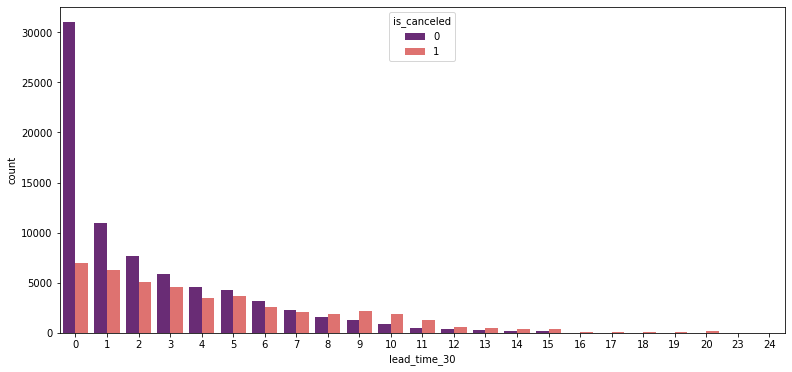

In [ ]:
#### ====== VISUALISASI DATA ========
### Bivariate/Multivariate
hotel['lead_time_30'] = hotel['lead_time']//30  # convert to month

##== graph between is_canceled and lead_time_30
plt.figure(figsize=(13,6))
sns.countplot(x=hotel['lead_time_30'], hue=hotel['is_canceled'], palette='magma')
plt.title("")
#Interpretasi:
#customers cenderung melakukan cancel booking setelah lead time lebih dari 7 bulan
plt.show()

Text(0.5, 1.0, 'Arrival Month VS is_canceled')

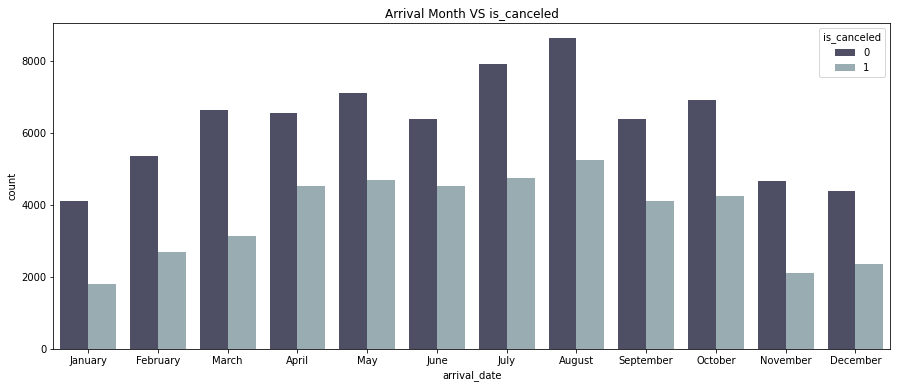

In [ ]:
##== graph between arrival date column and is_canceled
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,6))
sns.countplot(x=arrival_date_dt.month_name(), palette='bone',hue=hotel['is_canceled'], order=order)
plt.title('Arrival Month VS is_canceled')

#Interpretasi:
#cancel tertinggi terjadi pada bulan agustus, kemudian setelahnya mengalami penurunan 

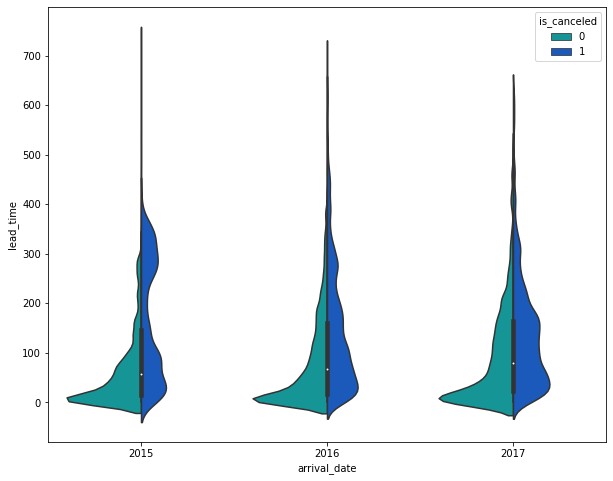

In [ ]:
## graph among is_canceled, Arrival Date, lead_time (days)
plt.figure(figsize=(10,8))
sns.violinplot(x=arrival_date_dt.year, y='lead_time', data=hotel, palette='winter_r', hue='is_canceled',

#Interpretasi:
#dari tahun 2015-2017,customers yang tidak melakukan cancel booking (0) memiliki range lead_time yang hampir sama (0-300)days
#sedangkan untuk customers yang melakkan cancel booking(1) memiliki distribusi sebaran data yang lebih luas (0-425)days
#semakin lama lead_time maka customers akan melakukan cancel book

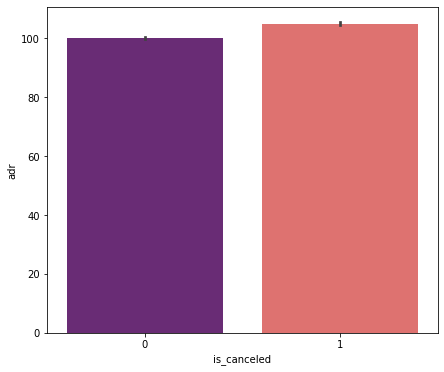

In [ ]:
##graph between is_canceled and adr
#start from this problem
plt.figure(figsize=(7,6))
sns.barplot(x='is_canceled', y='adr', data=hotel, palette='magma')

#interpretasi:
#adr pada cancel booking lebih tinggi dibandingkan dengan yang tidak cancel booking
#artinya adr yang tinggi menyebabkan customers melakukan cancel booking

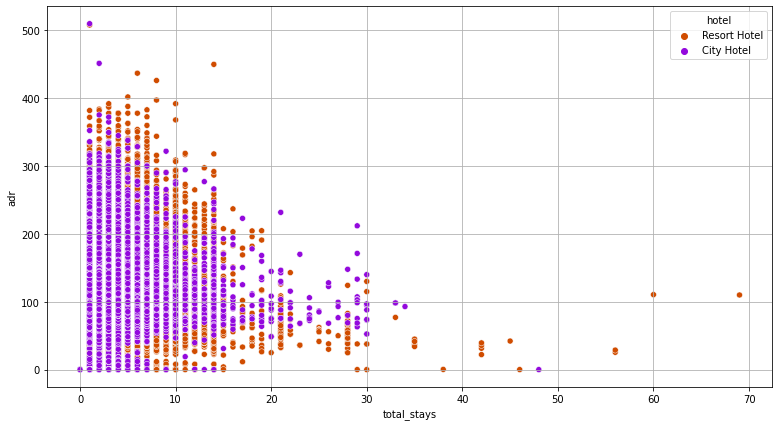

In [ ]:
##lmplot between hotel and total_stays, idr
plt.figure(figsize=(13,7))
sns.scatterplot(x='total_stays', y='adr', data=hotel[hotel['adr'] < 1000], hue='hotel', palette='gnuplot_r')
plt.grid()

#interpretasi:
#terlihat bahwa resort hotel memiliki range stay yang lebih lama
#semakin kecil total stays maka nilai adr akan semakin tinggi
#sebaliknya apabila total_stays tinggi maka adr rendah

<Figure size 936x504 with 0 Axes>

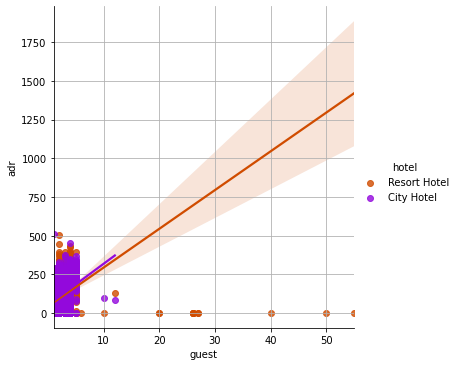

In [ ]:
#graph among adr, guests, hotel
plt.figure(figsize=(13,7))
sns.lmplot(x='guest', y='adr', data=hotel[hotel['adr'] < 1000], hue='hotel', palette='gnuplot_r')
plt.grid()

#interpretasi:
#antara guests dengan adr memiliki hubungan yang positif
#guests banyak terdapat pada resort hotel
#semakin banyak guests maka adrnya akan semakin tinggi

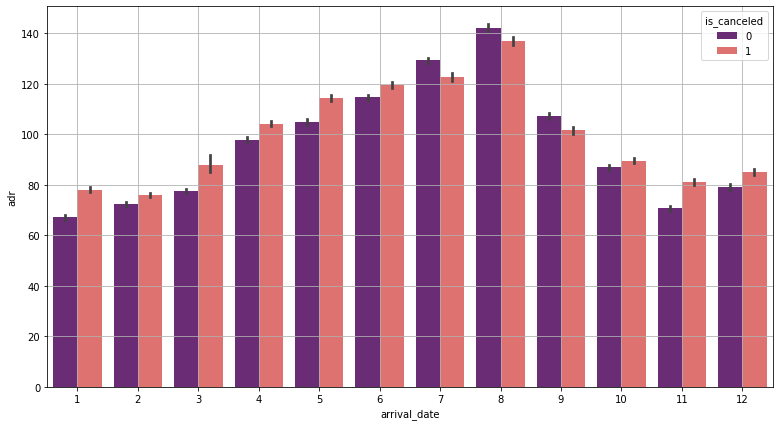

In [ ]:
#graph among is_canceled, arrive month, adr
plt.figure(figsize=(13,7))
sns.barplot(x=arrival_date_dt.month,y='adr', data=hotel, hue='is_canceled', palette='magma')
plt.grid()

#Interpretasi:
#terlihat selain pada bulan July, August, September, rata2 adr pada cancel booking lebih tinggi dibandingkan not cancel

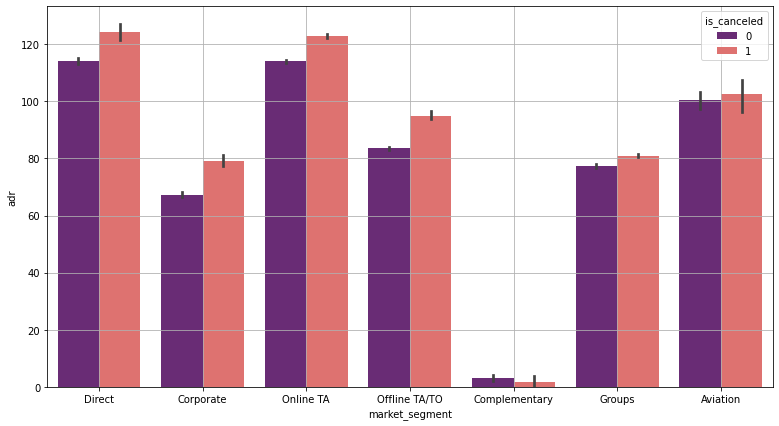

In [ ]:
#graph among adr, is_cancel, market_segment
plt.figure(figsize=(13,7))
sns.barplot(x='market_segment',y='adr', data=hotel, hue='is_canceled', palette='magma')
plt.grid()

#Interpretasi:
#adr pada cancel booking (1) dari masing2 market segment selalu lebih tinggi dibandingkan no cancel booking(0) kecuali pada Complementary

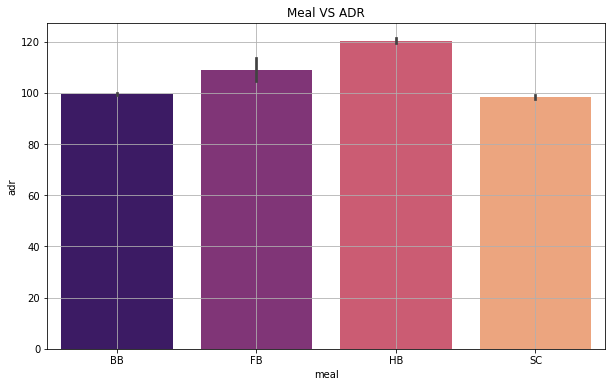

In [ ]:
#graph between adr, meal
#Note:['Bed & Breakfast','Half board','Full Board','No Pakages']
plt.figure(figsize=(10,6))
sns.barplot(x=hotel['meal'], y=hotel['adr'], palette='magma')
plt.title('Meal VS ADR')
plt.grid()

#interpretasi:
#exspensive meals ==> HB
#Half board memiliki rata2 adr yang paling tinggi 
#HB : Half board (breakfast and oneother meal – usually dinner)


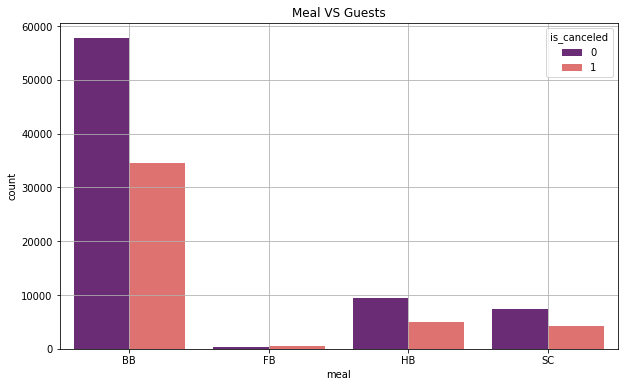

In [ ]:
#graph between guests, meal
#Note:['Bed & Breakfast','Half board','Full Board','No Pakages']
plt.figure(figsize=(10,6))
sns.countplot(x=hotel['meal'], palette='magma', hue=hotel['is_canceled'])
plt.title('Meal VS Guests')
plt.grid()

#Interpretasi:
#most meal to be likes ==> BB

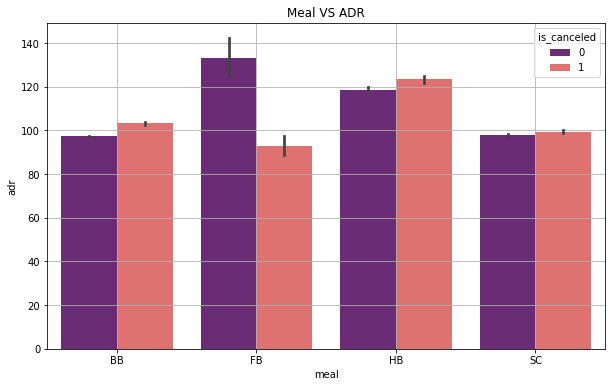

In [ ]:
#graph between adr, meal, is_canceled
#Note:['Bed & Breakfast','Half board','Full Board','No Pakages']
plt.figure(figsize=(10,6))
sns.barplot(x=hotel['meal'], y=hotel['adr'], palette='magma', hue=hotel['is_canceled'])
plt.title('Meal VS ADR')
plt.grid()

#interpretasi:
# FULL BOARD memiliki adr paling tinggi dibandingkan jenis meal lainnya
# SC memiliki adr paling rendah dibandingkan jenis meal lainnya

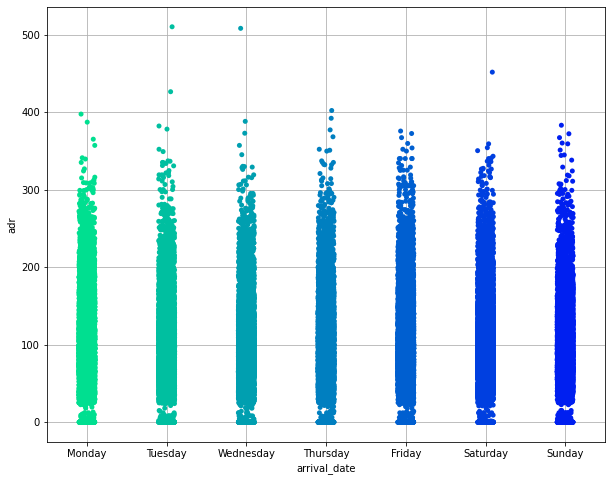

In [ ]:
##Stripplot untuk data not cancel (0)
plt.figure(figsize=(10,8))
order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']
sns.stripplot(x=arrival_date_dt.day_name(), y='adr', data=df_not_canceled, palette='winter_r',order=order,dodge=True)
plt.grid()
#

Text(0.5, 1.0, 'Month Arrival VS adr')

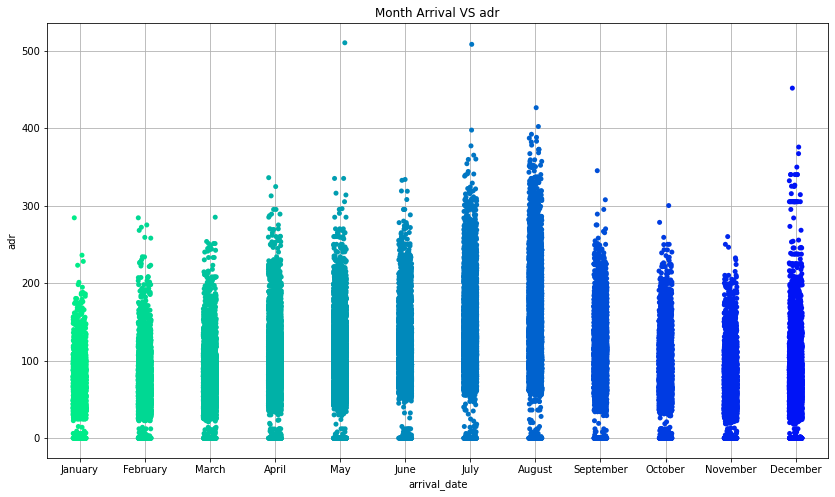

In [ ]:
##Stripplot untuk data not cancel (0)
plt.figure(figsize=(14,8))
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.stripplot(x=arrival_date_dt.month_name(), y='adr', data=df_not_canceled, palette='winter_r',order=order,dodge=True)
plt.grid()
plt.title('Month Arrival VS adr')

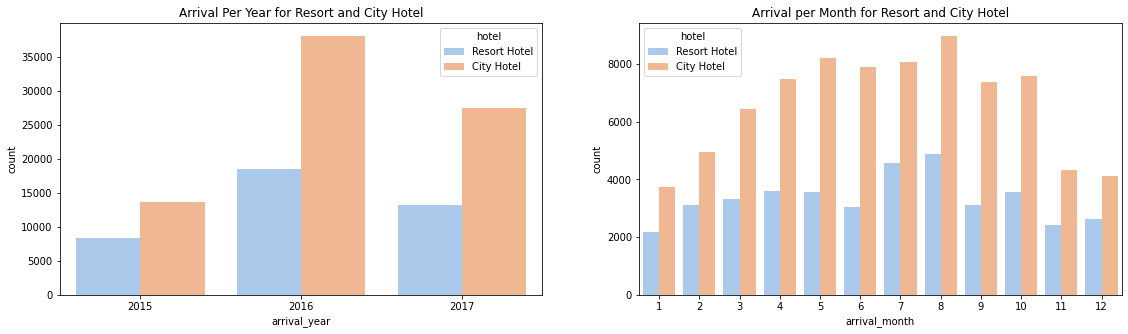

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'arrival_year', hue = 'hotel', data = hotel, palette = 'pastel')
plt.title("Arrival Per Year for Resort and City Hotel")
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', hue = 'hotel', data = hotel, palette = 'pastel')
plt.title("Arrival per Month for Resort and City Hotel")
plt.subplots_adjust(right = 1.6)

plt.show()


# Both hotel has their highest booking in 2016 
# City Hotel has more booking compared to resort hotel
# for month to month analysis, August seems to be the busiest month for both hotels, and january seems to be least busy month for both hotels

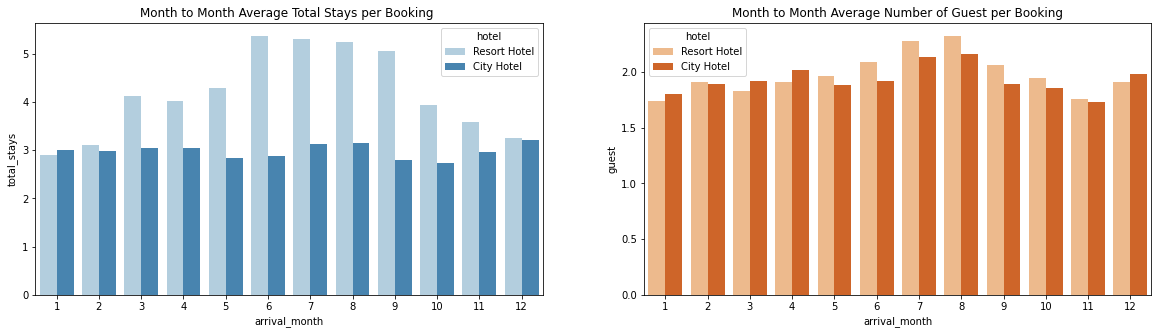

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.barplot(x = 'arrival_month', y= 'total_stays',hue = 'hotel', palette = 'Blues', data = hotel, ci = 0)
plt.title('Month to Month Average Total Stays per Booking ')
plt.subplot(1,2,2)
sns.barplot(x = 'arrival_month', y= 'guest',hue = 'hotel', palette = 'Oranges', data = hotel, ci = 0)
plt.title('Month to Month Average Number of Guest per Booking')
plt.show()

# For month to month analysis traveler who booked resort hotel tend to stay longer compared to traveler who booked city hotel
# For Majority of the year both hotel has almost similar number of guest of each booking 
# For City Hotel traveler stays for 3 days in average for the majority of the year

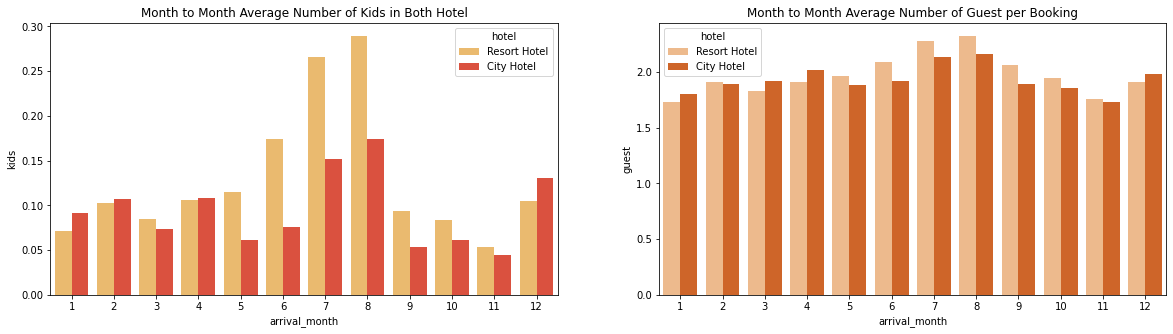

In [ ]:
plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.barplot(x = 'arrival_month', y= 'kids',hue = 'hotel', palette = 'YlOrRd', data = hotel, ci = 0)
plt.title('Month to Month Average Number of Kids in Both Hotel')
plt.subplot(1,2,2)
sns.barplot(x = 'arrival_month', y= 'guest',hue = 'hotel', palette = 'Oranges', data = hotel, ci = 0)
plt.title('Month to Month Average Number of Guest per Booking')

plt.show()


# Number of kids arrived in resort hotel gradually increasing starting from march to august
    # this might due to school holidat ('Assumption')

    
# There is a sudden increase in the number of Kids arrival in December for both hotel
    
## Consult this with the team 

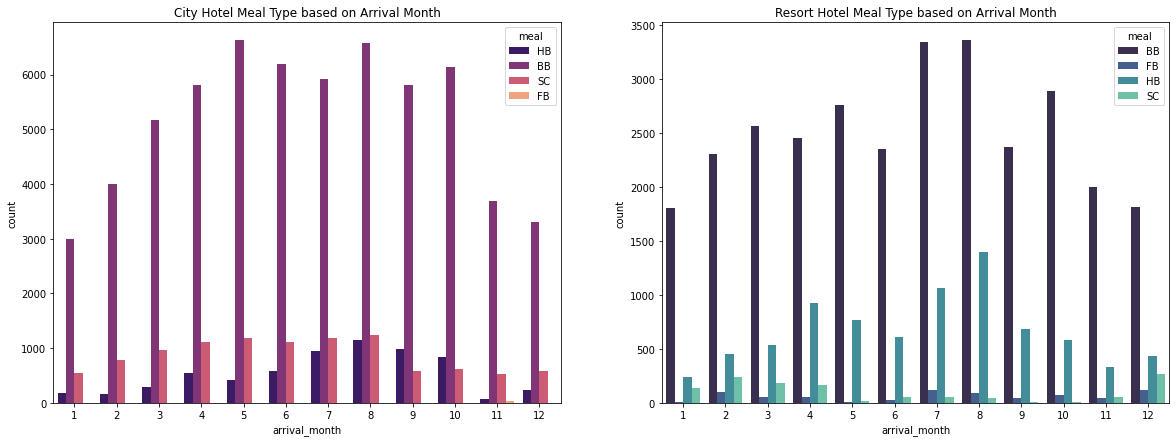

In [ ]:
plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
sns.countplot(x = 'arrival_month', hue = 'meal', data = hotel[hotel['hotel'] == 'City Hotel'], palette = 'magma')
plt.title('City Hotel Meal Type based on Arrival Month')
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', hue = 'meal', data = hotel[hotel['hotel'] == 'Resort Hotel'], palette = 'mako')
plt.title('Resort Hotel Meal Type based on Arrival Month')
plt.show()
# Bed and Breakfast seems to be the most popular meal package for both hotel with the highest demand on 
    # May for City Hotel and August For Resort Hotel
    
# No meal package or SC is second most popular package for city hotel for majority of the year
# For Resort Hotel Half Board Meal Package is the second most popular meal package

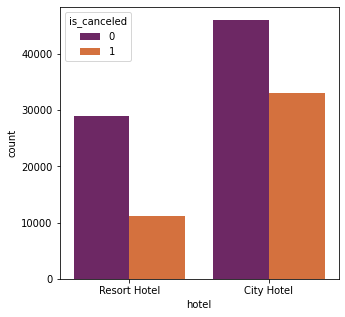

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x= 'hotel', hue = 'is_canceled', data = hotel, palette = 'inferno')

# This Shows that city hotel is more people preffered city hotel compared to resort hotel
# resort hotel has a lower cancellation rate compared to city hotel

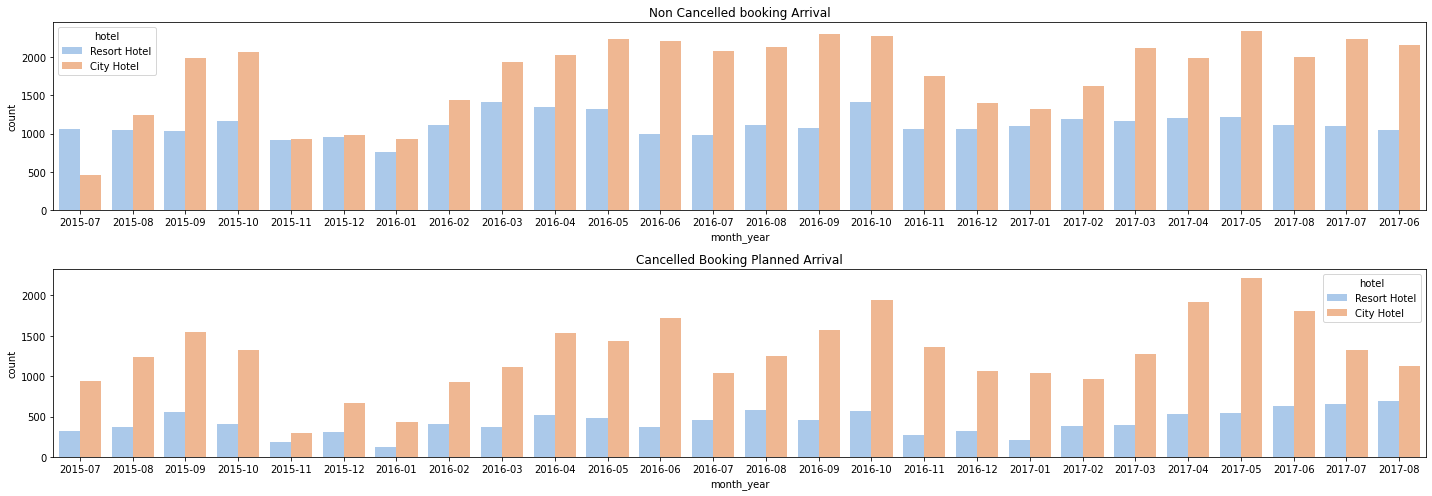

In [ ]:
plt.figure(figsize = (20, 7))
plt.subplot(2,1,1)
sns.countplot(data = df_not_canceled, x = 'month_year', hue = 'hotel', palette = 'pastel')
plt.title('Non Cancelled booking Arrival')
plt.subplot(2,1,2)
sns.countplot(data = df_canceled, x = 'month_year', hue = 'hotel', palette = 'pastel')
plt.title('Cancelled Booking Planned Arrival')
plt.tight_layout()
plt.show()

# the highest cancellation rate for city hotel happened on may 2017
# while for resort hotel the highest cancellation rate happened on August 2017

# For no Cancelled Booking City hotel has the highest confirmed booking on september 2016 and may 2017
# For Resort Hotel highest confirmed arrival on march 2016 and october 2016

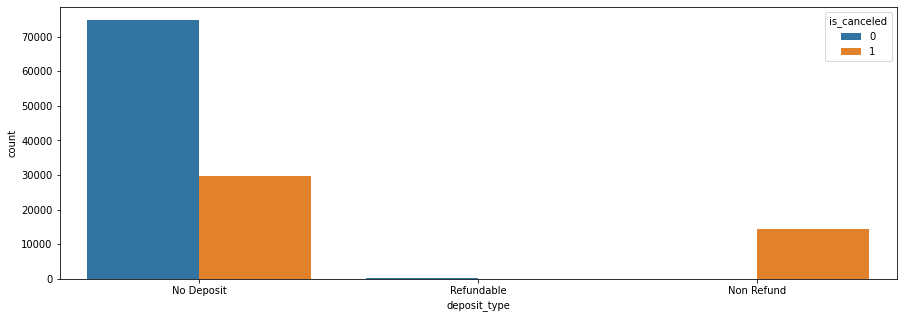

In [ ]:
## Cancellation and deposit
plt.figure(figsize = (15, 5))
sns.countplot(data = hotel, x = 'deposit_type', hue = 'is_canceled')

# from this graph we could conclude no deposit policy might lead into a higher cancellation rate
# we are not gonna focus too much on the no refund policy since it wouldn't hurt hotel profit as bad as no deposit

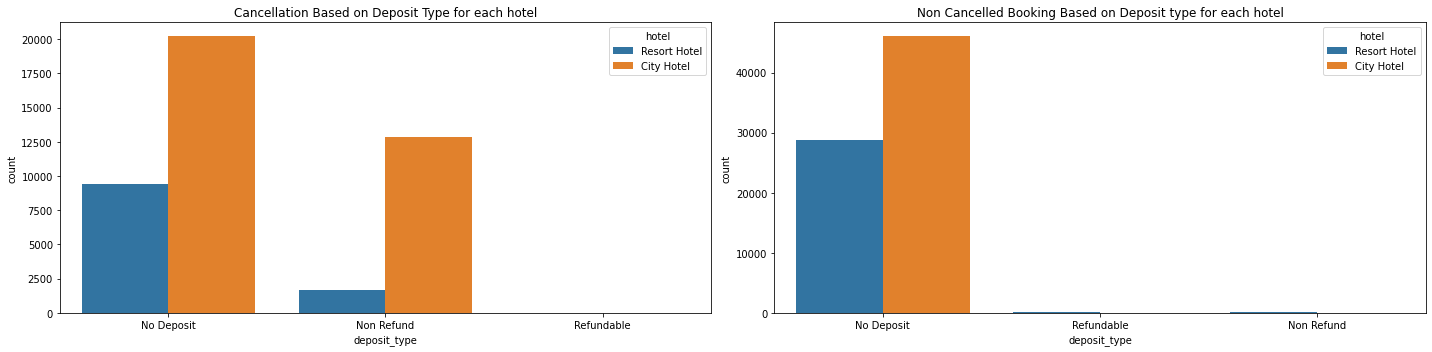

In [ ]:
#cancellation and deposit type of each hotel
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.countplot(data = df_canceled, x = 'deposit_type', hue = 'hotel')
plt.title("Cancellation Based on Deposit Type for each hotel")
plt.subplot(1,2,2)
sns.countplot(data = df_not_canceled, x = 'deposit_type', hue = 'hotel')
plt.title("Non Cancelled Booking Based on Deposit type for each hotel")
plt.tight_layout()
plt.show()

# No Deposit policy has the highest amount of cancellation of rate of all deposit types policy in both hotel
# Non Refund policy comes second in the highest number of cancellation

#Majority of confirmed booking is on no deposit policy as well

# Suggestion:
    # Non Refund deposit policy should be pushout more since it wouldn't hurt hotel in term of reevenue when the traveler canceled


Text(0.5, 1.0, 'Market Segment of canceled and non canceled booking')

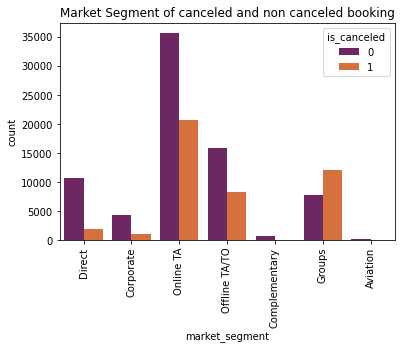

In [ ]:
schart = sns.countplot(x= 'market_segment', hue = 'is_canceled', data = hotel, palette = 'inferno')
schart.set_xticklabels(
    schart.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of canceled and non canceled booking')

# Group Booking is the only market segment that has a higher cancellation rate compared to it's non canceled booking the other market segment

# Online Travel Agent 

Text(0.5, 1.0, 'Market Segment of cancelled booking in both hotel')

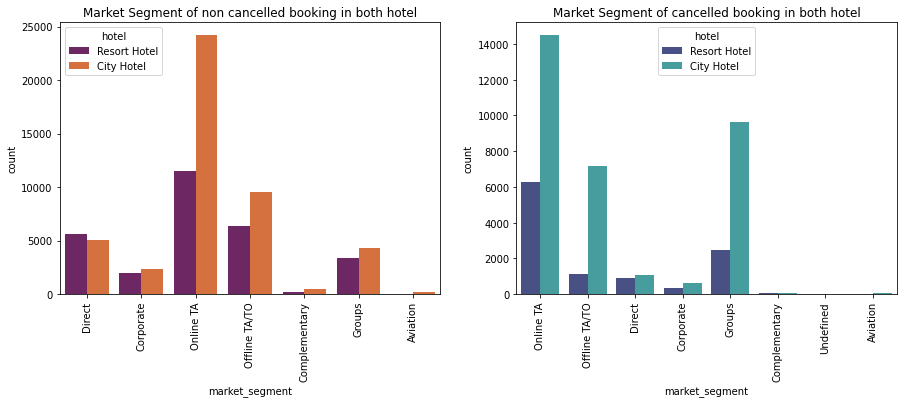

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
chart = sns.countplot(x= 'market_segment', hue = 'hotel', data = df_not_canceled, palette = 'inferno')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of non cancelled booking in both hotel')

plt.subplot(1,2,2)
chart1 = sns.countplot(x= 'market_segment', hue = 'hotel', data = df_canceled, palette = 'mako')
chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of cancelled booking in both hotel')

Text(0.5, 1.0, 'Arrival Month to Month Basis')

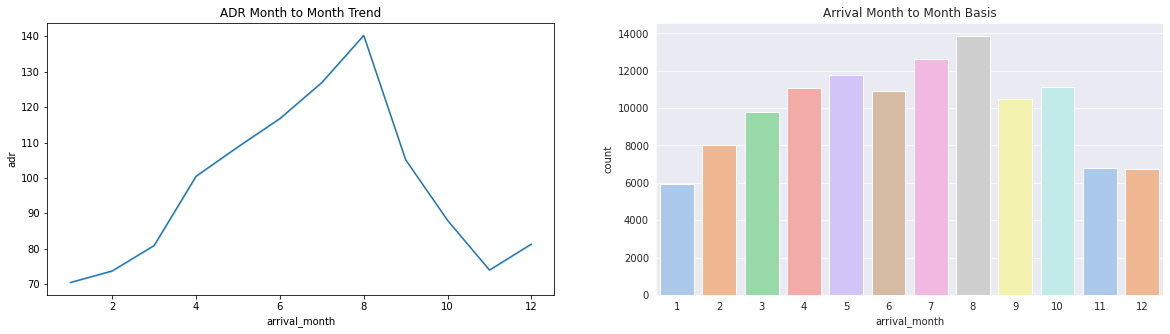

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.lineplot(x= 'arrival_month', y='adr', data = hotel, palette = 'Spectral', ci = 0)
plt.title('ADR Month to Month Trend')
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', data = hotel, palette = 'pastel')
plt.title('Arrival Month to Month Basis')

# majority of market segment adr going up from january to august with few exception of aviation and groups
# From August to the end of the year majority adr trend are going down

# Number of Arrival seems to have a positive correlation with adr

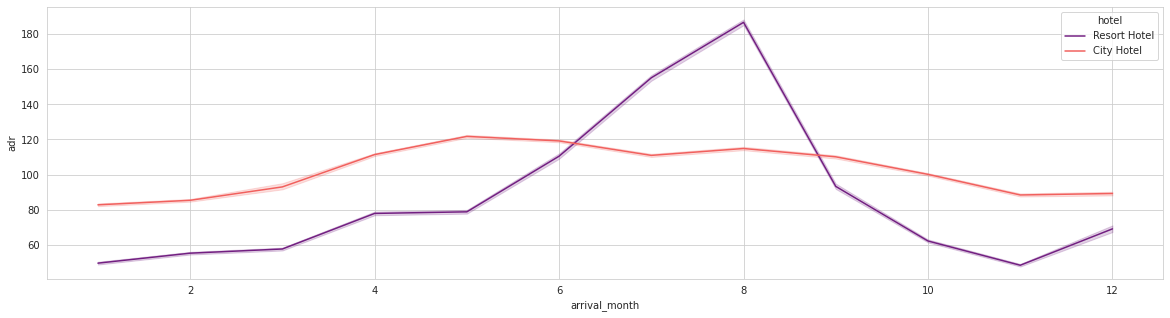

In [ ]:
plt.figure(figsize = (20,5))
sns.set_style('whitegrid')
sns.lineplot(x= 'arrival_month', y='adr', hue = 'hotel', data = hotel, palette = 'magma')

## Resort hotel adr tend to be more fluctuative compared to city hotel, January seems to be the lowest adr for resort hotel

## for city hotel adr seems to be more stable it has it lowest adr on January

# for most of the year city hotel has a higher adr compared to resort hotel, with exception of july and august
# adr resort hotel showing positive trend from january to august after that the adr showing negative trend until november

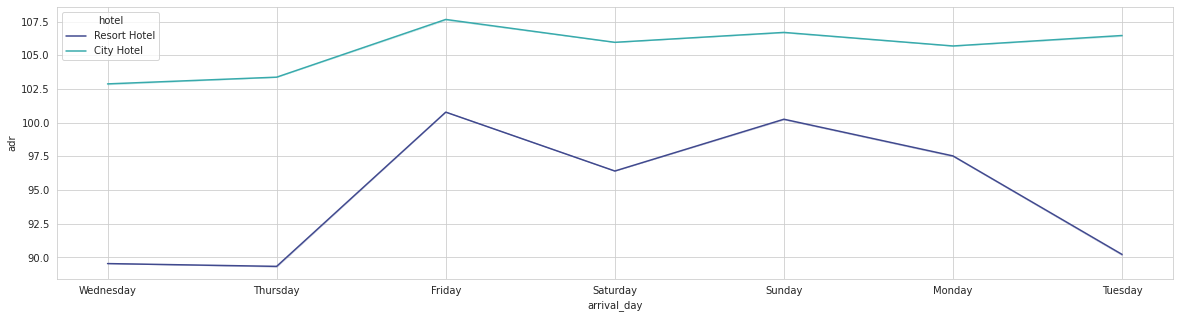

In [ ]:
plt.figure(figsize = (20,5))
sns.set_style('whitegrid')
sns.lineplot(x= 'arrival_day', y='adr', hue = 'hotel', data = hotel, palette = 'mako', ci = 0)

# Booking on the arrival day of Friday seems to have the most expensive adr in both hotel
# While Arrival day on Wednesday seems to have the lowest adr on both hotel

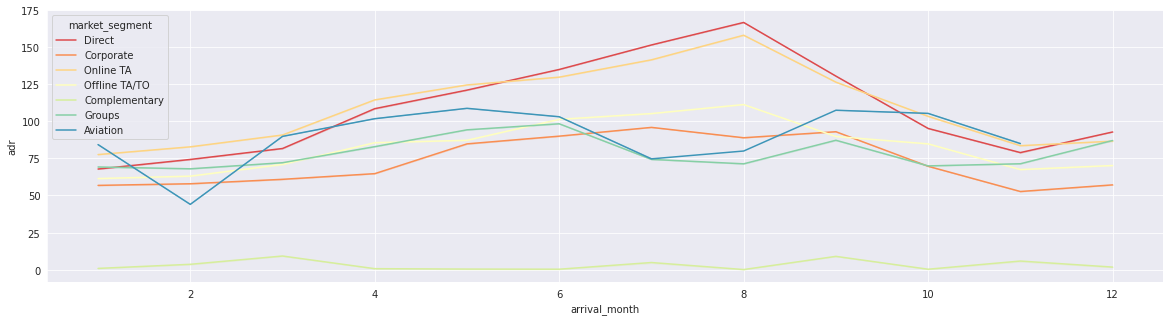

In [ ]:
plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
sns.lineplot(x= 'arrival_month', y='adr', data = hotel, hue = 'market_segment', palette = 'Spectral', ci = 0)

# Corporate seems to have the lowest adr for majority of the first six month of the year
# majority of market segment adr going up from january to august with few exception of aviation and groups
# From August to the end of the year majority adr trend are going down

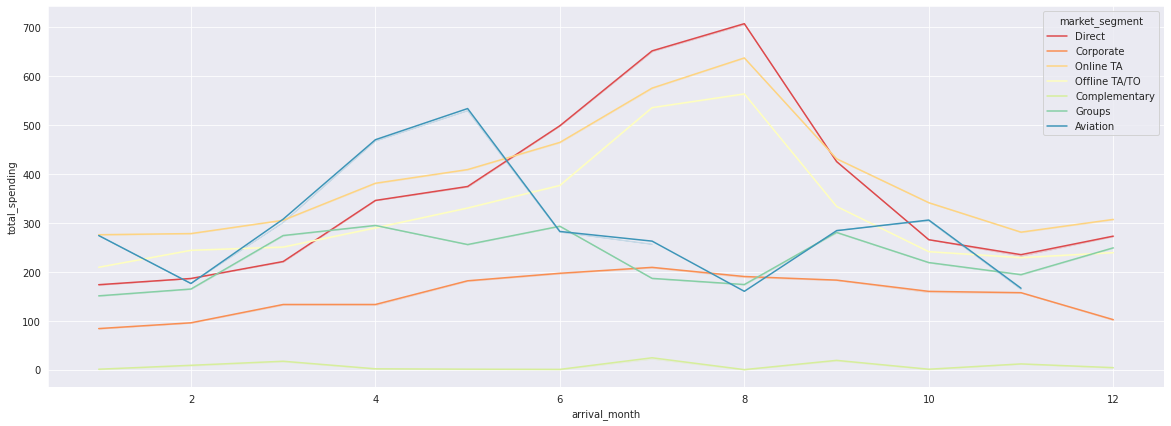

In [ ]:
plt.figure(figsize = (20,7))
sns.set_style('darkgrid')
sns.lineplot(x = 'arrival_month', y = 'total_spending', hue = 'market_segment', data = hotel, palette = 'Spectral', ci = 0)
# ADR pada 'direct booking' paling besar dibandingkan market segment lainnya
# ADR pada 'corporate' paling kecil dibandingkan market segment lainnya
# 'complementary' diabaikan karena merupakan jenis segment gratis

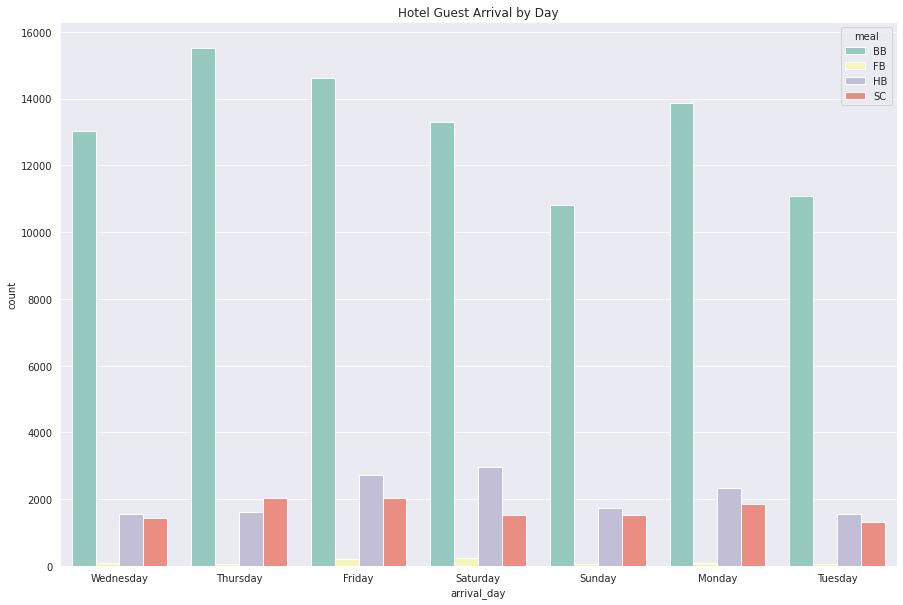

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data = hotel, x = 'arrival_day', hue = 'meal', palette = 'Set3')
plt.title("Hotel Guest Arrival by Day")
plt.show()

# terlihat bahwa meal yang paling banyak dipesan adalah BB di setiap harinya

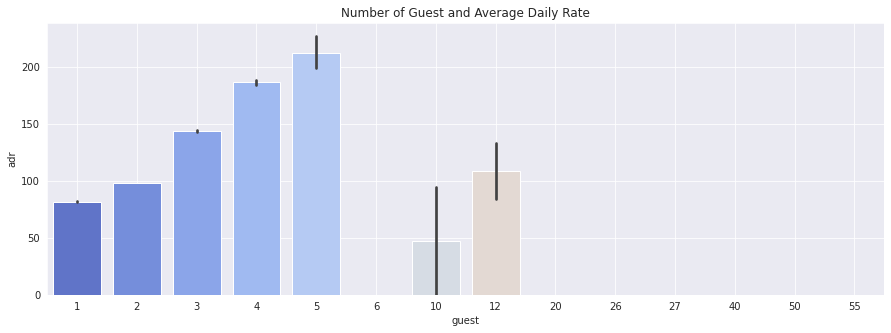

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'guest', y = 'adr', data = hotel, palette = 'coolwarm')
plt.title("Number of Guest and Average Daily Rate")
plt.grid(True)
plt.show()

# terlihat bahwa booking dengan 5 orang menghasilkan nilai 'adr' paling tinggi

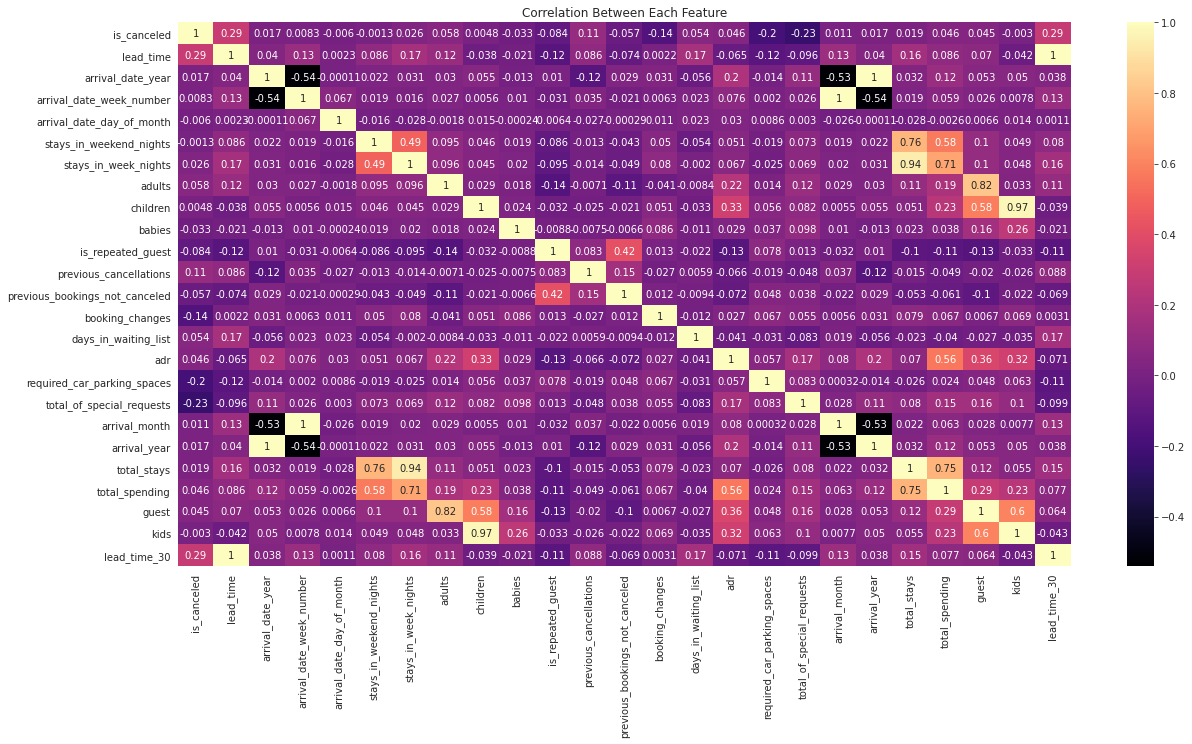

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(hotel.corr(), cmap = 'magma', annot = True)
plt.title("Correlation Between Each Feature")

plt.show()

# terlihat bahwa terdapat korelasi kuat antara 'total stays' dengan 'stays_in_wwek_nights' dan 'stays_in_weekend_nights'. Hal ini wajar mengingat kolom tersebut merupakan ekstraksi dari keduanya.
# begitu juga antara 'adr' dgn 'total spending'
# sebesar 0.29, korelasi is_canceled dengan lead_time. Meski kecil namun terlihat sangat berpengaruh ketika kita melihat visualisasi-visualisasi sebelumnya.

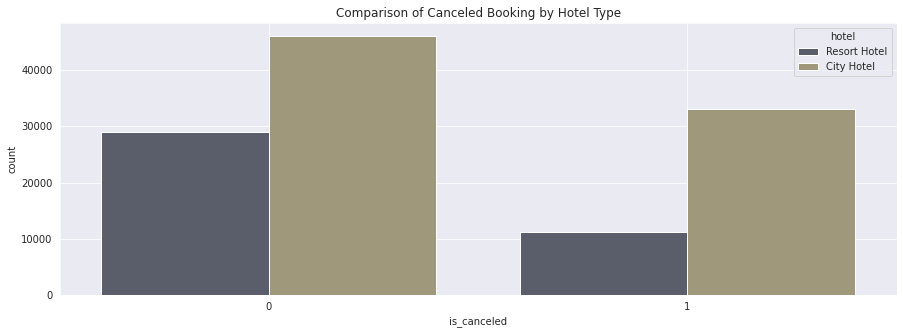

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'is_canceled', data = hotel, hue = 'hotel', palette = 'cividis')
plt.title("Comparison of Canceled Booking by Hotel Type")
plt.grid(True)
plt.show()

# Terlihat bahwa City Hotel tetap lebih dominan untuk booking yang dibatalkan maupun yang tidak

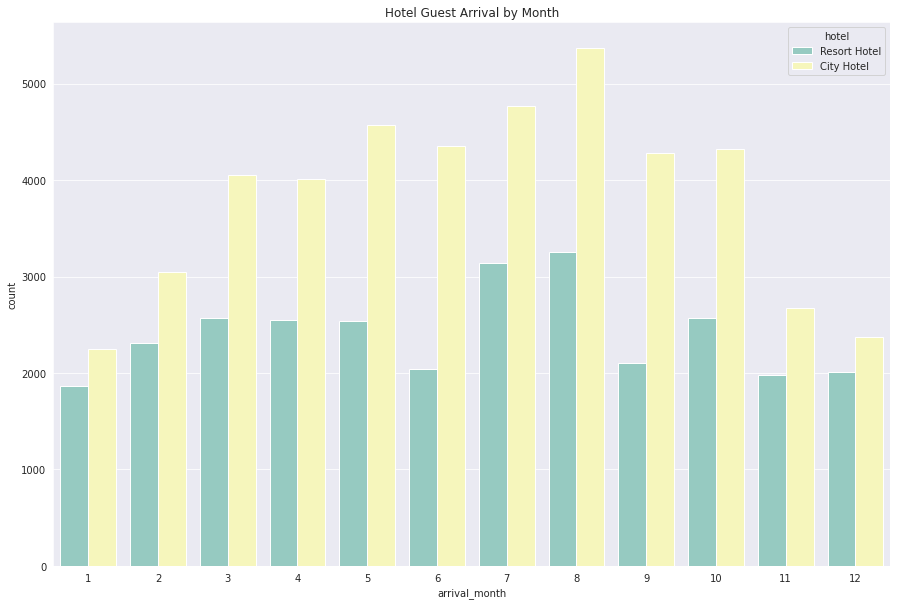

In [ ]:
hotel_nc = hotel[hotel['is_canceled'] == 0]

plt.figure(figsize = (15,10))
sns.countplot(data = hotel_nc, x = 'arrival_month', hue = 'hotel',palette = 'Set3')
plt.title("Hotel Guest Arrival by Month")
plt.show()

# Whether Resort or City Hotel, Q2-Q3 has its peak. Take a look on July-August.
# Both Resort and City has same up-trend

# The interesting fact is, notice in November and December bar.
# The City Hotel is going down, while Resort Hotel is going up.
# We see that people tend to spend their holidays on the Hotel with sceneric view, eventhough by number the City Hotel is still the most booked.

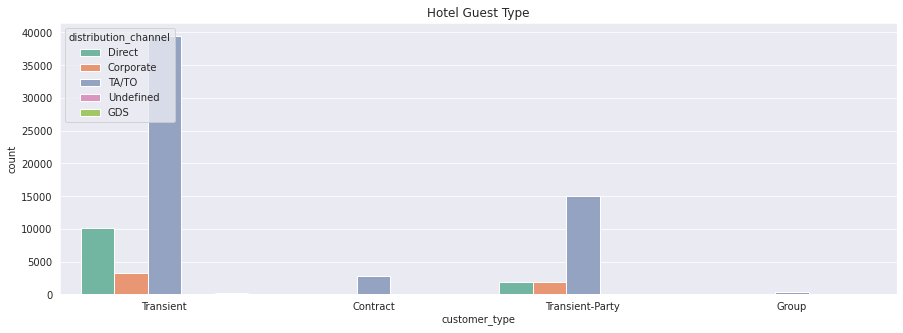

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel_nc, x = 'customer_type', hue = 'distribution_channel', palette = 'Set2')
plt.title("Hotel Guest Type")
plt.show()

# Contract - when the booking has an allotment or other type of contract associated to it; 
# Group – when the booking is associated to a group; 
# Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
# Transient-party – when the booking is transient, but is associated to at least other transient booking."

# we see that 'transient' is the most type that booked the hotel. We know now that most guests is not part of a group or a contract, and isn't associated to other transient booking

In [ ]:
bymonth = hotel_nc.groupby('arrival_month').count()
bymonth
# membuat dataframe baru yang digabungkan berdasarkan 'arrival_month'

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest,kids,lead_time_30
arrival_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115
2,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359
3,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619
4,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560
5,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103
6,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395
7,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907
8,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624
9,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385


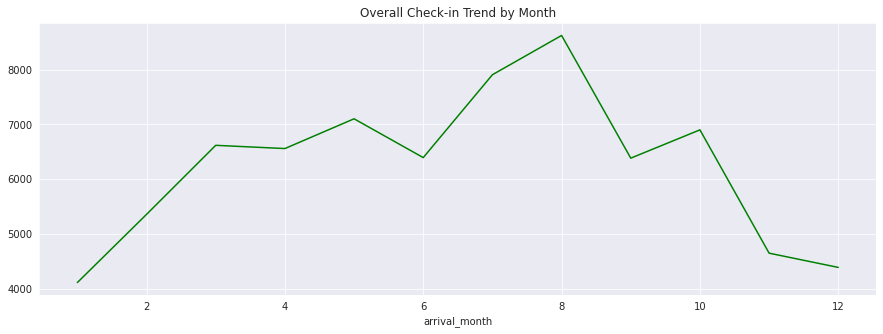

In [ ]:

plt.figure(figsize = (15,5))
bymonth['hotel'].plot(color = 'green')
plt.title("Overall Check-in Trend by Month")
plt.grid(True)
plt.show()

# Trend line sepanjang 12 bulan
# terlihat puncaknya ada di bulan Agustus, Juli, Mei, dan Oktober

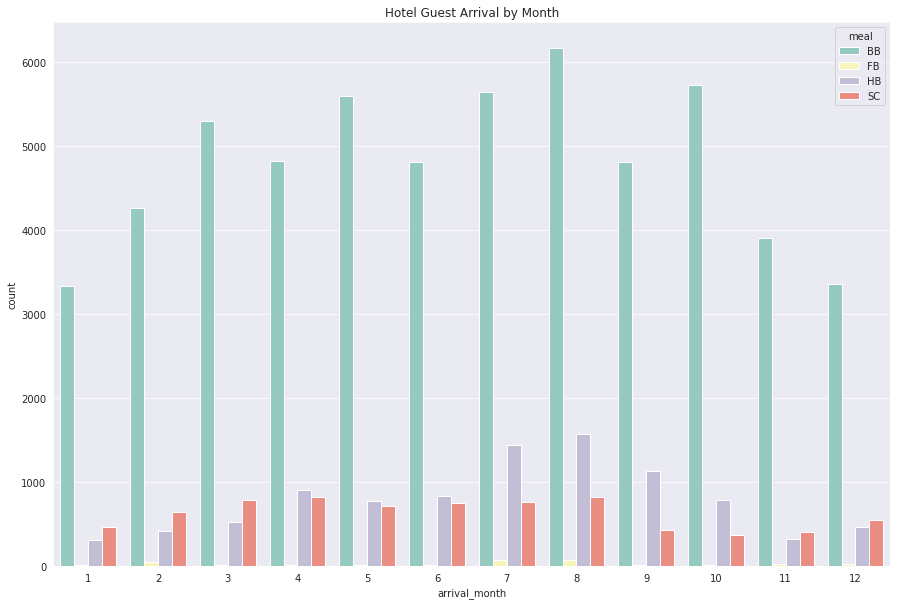

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data = hotel_nc, x = 'arrival_month', hue = 'meal',palette = 'Set3')
plt.title("Hotel Guest Arrival by Month")
plt.show()

# We see that guests tend to book the room with 'BB' package.
# While 'HB' and 'SC' is vary depends on the month
# Take a look on July-August, they have 'HB' more than 'SC'.
# But when we look on November-March, guests tend to 'SC' rather than 'HB'
# We understand when we approach holiday months or earlier year, guests tend to have a room but they have their own agenda to enjoy the city or hangout to other places.


In [ ]:
byDay = hotel_nc.groupby(['arrival_day','arrival_month']).count()
# byDay
bymonth_day = byDay['hotel'].unstack(level = -1)
bymonth_day

arrival_month,1,2,3,4,5,6,7,8,9,10,11,12
arrival_day,,,,,,,,,,,,
Friday,564,943,1063,1044,779,1191,1099,1144,1127,1113,865,695
Monday,703,781,977,1004,1314,954,1261,1578,982,1099,831,479
Saturday,642,1059,723,1174,786,733,1476,1281,746,829,620,839
Sunday,485,692,775,840,980,859,1088,1135,770,1109,466,362
Thursday,562,691,1268,834,1218,1084,1107,1135,988,1074,565,775
Tuesday,613,540,818,719,1110,736,900,1146,819,794,607,574
Wednesday,546,653,995,945,916,838,976,1205,953,883,697,667


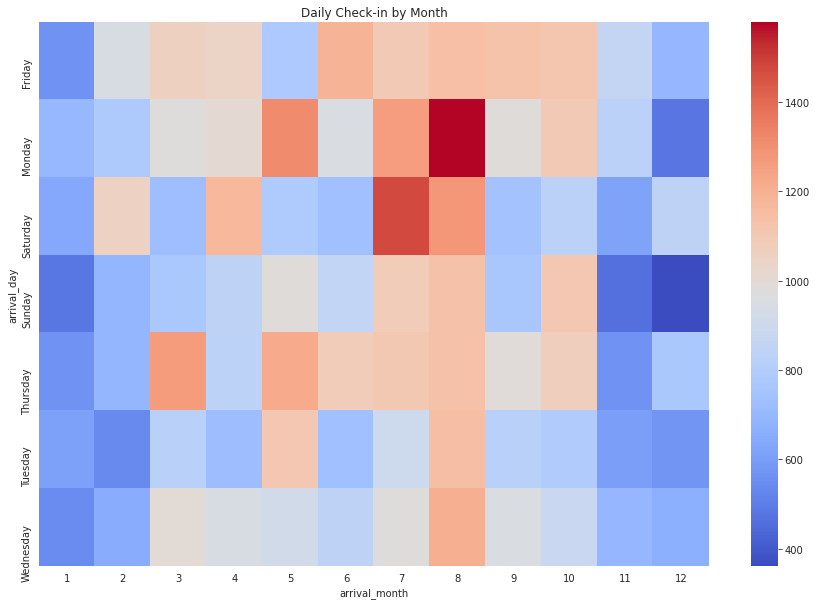

In [ ]:

plt.figure(figsize = (15,10))
sns.heatmap(bymonth_day, cmap = 'coolwarm')
plt.title("Daily Check-in by Month")
plt.show()

# terlihat bahwa Check-in terbanyak ada pada bulan Juli dan Agustus, terutama setiap hari Sabtu dan Senin
# Manajemen hotel bisa berkoordinasi dengan tim restoran di mana berdasarkan grafik terlihat guest lebih banyak datang pada bulan Juli dan Agustus. 
# Terutama pada hari Sabtu dan Senin adalah puncak di mana guest berdatangan.
# Tim Restoran dapat menambah resources pada bahan makanan maupun tenaga kerja untuk melayani dengan maksimal namun efisien

<Figure size 1080x720 with 0 Axes>

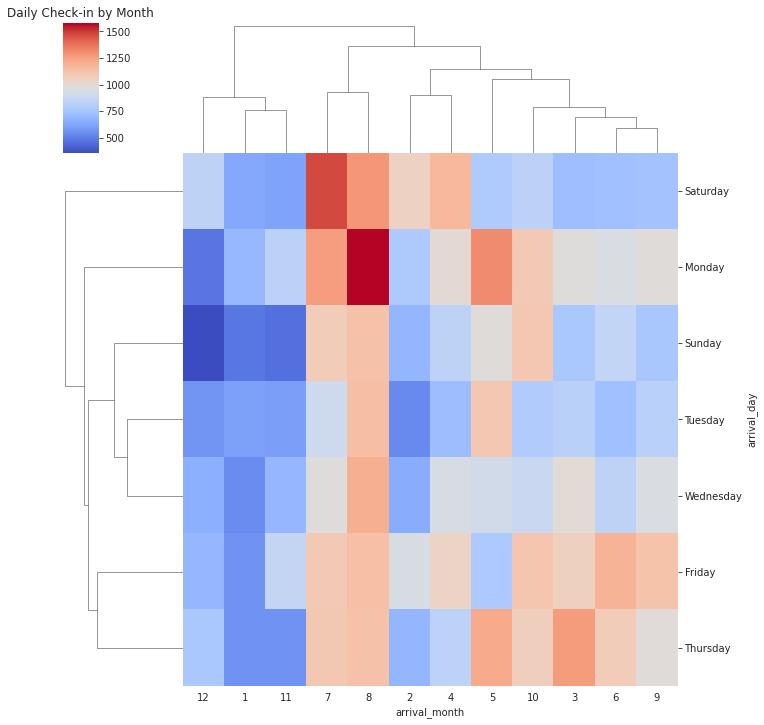

In [ ]:

plt.figure(figsize = (15,10))
sns.clustermap(bymonth_day, cmap = 'coolwarm')
plt.title("Daily Check-in by Month")
plt.show()

# terlihat bahwa Check-in terbanyak ada pada bulan Juli dan Agustus, terutama setiap hari Sabtu dan Senin
# di cluster map ini terlihat kontras bahwa bulan November, Desember, dan Januari malah memiliki jumlah guest yang jauh lebih sepi dibandingkan bulan-bulan lainnya
# Hal ini bisa disiasati bahwa meminimalisir resources makanan maupun tenaga kerja dapat dilakukan pada bulan-bulan tersebut untuk efisiensi keuangan maupun kesegaran bahan makanan

# 8) Conclusion
- Number Booking have a positive correlation with the number of cancellation
- Group Booking is the only market segment that have a higher cancellation  arrival  compared to it’s confirmed arrival
- Customer who has 7 month or more lead time have a higher tendencies to cancel their booking
- Traveler that has cancelled 1 time before has the highest tendencies to cancel again
- Guests tend to book their rooms with breakfast instead of lunch or dinner.
- Most guests come and start to stay in May, July, August, and October.
- In Portugal, the busiest month in the hotels are July and August, especially on Saturday and Monday when guests start to check-in.



# 9) Recommendations
- **More Rigid /Stricter  Cancellation T&C  For Customer Who has Cancelled Before.** This is  one way to  reducing the tendencies of customers who have cancelled before to cancelled again.
- **Non Refundable Only for Group Booking.** Group Booking has a higher cancellation rate compared to the confirmed rate,  with this policy hotel would not suffer  any loss revenue caused by cancelled group booking.
- **Non Refundable Booking Only For Booking with More than 210 lead days.** Since Customer who has more than 210  lead days has a higher chance of cancellation, having this policy will protect the hotel from losing revenue.
- **Breakfast Awareness.** Guests tend to have their bedrooms with breakfast package, so it might be good if management place more workers in the morning instead of noon or night. Even workers at the noon can be reduced and moved into the night shift. 
- **Resources Efficiency.** Resources are precious, especially when it comes to food and humans. July and August are the best time to stock more food especially on Saturday and Monday where guests start to check-in the room. The restaurant team could increase the number of workers too, to handle guests when meal time has come. This is good for cost efficiency so the resources either humans or food might not be wasted.






